In [1]:
import pandas as pd
import numpy as np
import math
import numpy.random as npr
from pylab import plt, mpl
from matplotlib import pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Freight Data

In [2]:
freight_data = pd.read_csv('Freight TSI.GDP.Quarterly.csv')

In [3]:
freight_data.head()

,Month of Date,TSI_FREIGHT,GDP
0,Jan-00,102.666667,98.456518
1,Apr-00,98.800000,100.249000
2,Jul-00,99.000000,100.349023
3,Oct-00,99.533333,100.945459
4,Jan-01,99.433333,100.618173


###  EDA

checking for shape and size of the dataframe

In [4]:
freight_data.shape

(91, 3)

Looking for null values

In [5]:
freight_data.isnull().sum()

Month of Date    0
TSI_FREIGHT      0
GDP              1
dtype: int64

Since there is only one null value we remove it from the dataset

In [6]:
freight_data.dropna(inplace = True)

In [7]:
freight_data.shape

(90, 3)

In [8]:
freight_data.isnull().sum()

Month of Date    0
TSI_FREIGHT      0
GDP              0
dtype: int64

Rename the column name for the ease

In [9]:
freight_data.columns

Index(['Month of Date', 'TSI_FREIGHT', 'GDP'], dtype='object')

In [10]:
freight_data.rename(columns={'Month of Date':'Month_of_Date'},inplace=True)

checking the datatype of the each column. here the month of date is object which should be datetime we will change it to date time.

In [11]:
freight_data.dtypes

Month_of_Date     object
TSI_FREIGHT      float64
GDP              float64
dtype: object

in the values of month of date columns, year are not entered correctly, so i edit the values of year and then convert it into datetime type

In [12]:
freight_data['Month_of_Date'] = freight_data['Month_of_Date'].apply(lambda x: x.replace("-", "-20" ))

In [13]:
freight_data['Month_of_Date'] = pd.to_datetime(freight_data['Month_of_Date'])

In [14]:
freight_data.head()

,Month_of_Date,TSI_FREIGHT,GDP
0,2000-01-01,102.666667,98.456518
1,2000-04-01,98.800000,100.249000
2,2000-07-01,99.000000,100.349023
3,2000-10-01,99.533333,100.945459
4,2001-01-01,99.433333,100.618173


converting Data into quarterly and setting the month of date as the index

In [15]:
freight_data = freight_data.set_index('Month_of_Date').resample('Q')['TSI_FREIGHT','GDP'].sum()

In [16]:
freight_data.head()

,TSI_FREIGHT,GDP
Month_of_Date,,
2000-03-31,102.666667,98.456518
2000-06-30,98.800000,100.249000
2000-09-30,99.000000,100.349023
2000-12-31,99.533333,100.945459
2001-03-31,99.433333,100.618173


Here Data is already arranged quarterly thats why we donot divide the sum with 3. and other point to mention here is that mean function cannot be applied with resample, so every time when i apply resample i will sum the values. and based on whether the data is pre- arranged quarterly or not, i will divide it with the number of month in each quarter .i.e. 3. 

### Descriptive statistics

In [17]:
freight_data.describe()

,TSI_FREIGHT,GDP
count,90.000000,90.000000
mean,116.121111,123.344388
std,12.857798,14.635424
min,95.533333,98.456518
25%,107.166666,114.001264
50%,112.400000,120.560945
75%,123.975000,134.708209
max,140.300000,150.755342


These are the descriptive analysis of a freight price dataset. this describe function show 8 different characteristics of the column of the dataframe. 
- count shows the number of items in the column
- mean is the average of all values in the columns
- std is the standard deviation of the columns values
- min shows the minimum values of each column
- 25% shows the first quantile
- 50% shows the second quantile
- 75% shows the third quantile of each column
- max shows the maximum value of each column

### Basic Visualization

/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


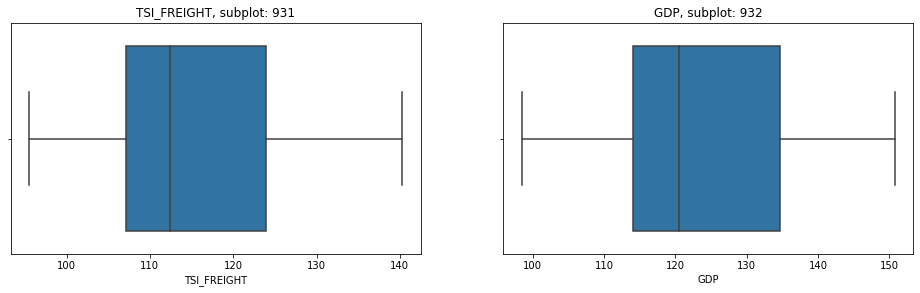

In [18]:
a=9
b=3
c=1
fig = plt.figure(figsize=(25,45))
for i in freight_data.columns:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(freight_data[i])
    c = c + 1

The above plot shows whether these columns have outliers or not. here we can see that there is no outlier in either of the column. and this blue box shows the first, second and third quantiles. the starting of the box shows the first quantile, the line in the middle of the box shows the second quantile and the ending of the box is the third quantile.

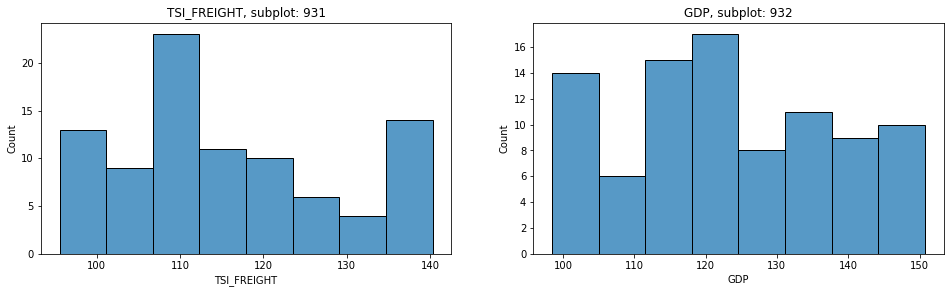

In [19]:
a=9
b=3
c=1
fig = plt.figure(figsize=(25,45))
for i in freight_data.columns:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.histplot(freight_data[i])
    c = c + 1

the above plots shows the histogram of each column.
- in TSI_FREIGHT column, we can see that the price of freight is mostly at 110, after that the price will at 140 and 100.
- in GDP column, the value of GDP usually around 100 to 125.

/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


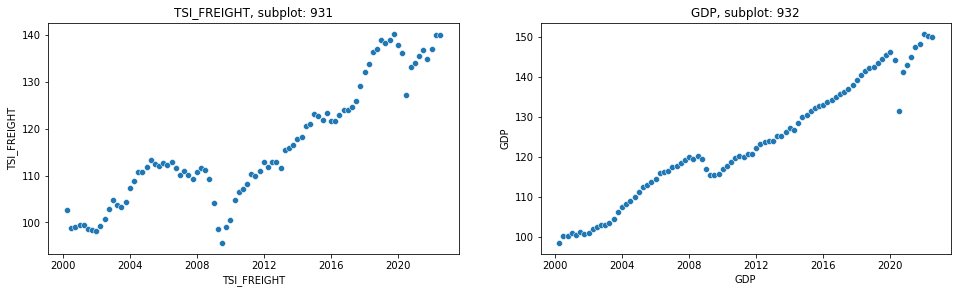

In [20]:
a=9
b=3
c=1
fig = plt.figure(figsize=(25,45))
for i in freight_data.columns:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.scatterplot(freight_data.index,freight_data[i])
    c = c + 1

The above plot are the scatter pot of each column against the date column(index of the dataframe)
- In FSI_FREIGHT plot, we can see that the there are some up and down in the prices. for example in 2003, 2007 to 2009, 2016 and 2020 the price decreases, while in other years the prices are increasing. But the general trend of price of the freight is increasing over the years. 
- In GDP plot we can see the same pattern as FSI_FREIGHT. the general trend in GDP is increasing whereas there are some points where GDP decrease.

/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


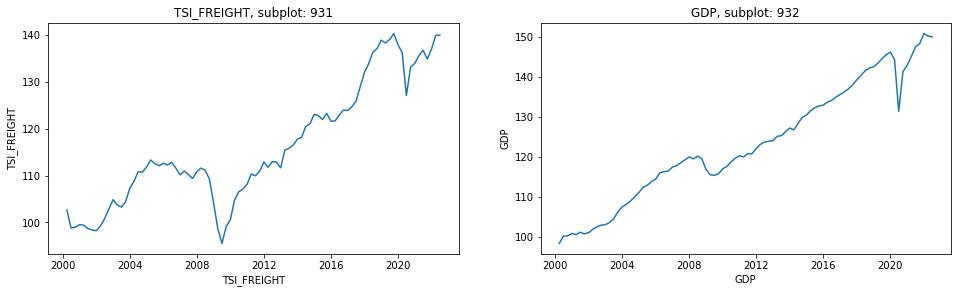

In [21]:
a=9
b=3
c=1
fig = plt.figure(figsize=(25,45))
for i in freight_data.columns:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.lineplot(freight_data.index,freight_data[i])
    c = c + 1

The above plot shows the lineplot for each of the column. Here these plots depict the same behavior as we seen above in the scatter plot, but here is the line plot for it.

# Gas Price Data

In [22]:
gasprice_data = pd.read_csv('Historical Gas Prices.csv')

In [23]:
gasprice_data.head()

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,01/02/1995,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,01/09/1995,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,01/16/1995,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
3,01/23/1995,1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
4,01/30/1995,1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090


### EDA

checking for shape and size of the dataframe

In [24]:
gasprice_data.shape

(1361, 14)

Looking for null values

In [25]:
gasprice_data.isnull().sum()

Date    0
A1      0
A2      0
A3      0
R1      0
R2      0
R3      0
M1      0
M2      0
M3      0
P1      0
P2      0
P3      0
D1      0
dtype: int64

Selecting only Date and A1 column

In [26]:
gasprice_data = gasprice_data[['Date','A1']]

checking the datatype of the each column. here the data type of date column is object which should datetime. so we will change it to date time.

In [27]:
gasprice_data.dtypes

Date     object
A1      float64
dtype: object

In [28]:
gasprice_data['Date'] = pd.to_datetime(gasprice_data['Date'])

In [29]:
gasprice_data.head()

,Date,A1
0,1995-01-02,1.127
1,1995-01-09,1.134
2,1995-01-16,1.126
3,1995-01-23,1.132
4,1995-01-30,1.131


Checking the values of the date. whether they are quarterly or not. here we see that data is not quarterly arranged.

In [30]:
gasprice_data['Date'].value_counts()

1995-01-02    1
2012-05-07    1
2012-07-02    1
2012-06-25    1
2012-06-18    1
             ..
2003-09-01    1
2003-08-25    1
2003-08-18    1
2003-08-11    1
2021-01-25    1
Name: Date, Length: 1361, dtype: int64

Converting Data into quaterly. since mean function doesnot work with resample method and data is not quarterly arranged, so we will divide the sum of each quarter value with 3

In [31]:
gasprice_data = pd.DataFrame(gasprice_data.set_index('Date').resample('Q')['A1'].mean())

In [32]:
gasprice_data.head()

,A1
Date,
1995-03-31,1.123462
1995-06-30,1.208385
1995-09-30,1.178077
1995-12-31,1.120923
1996-03-31,1.150615


### Descriptive statistics

In [33]:
gasprice_data.describe()

,A1
count,105.000000
mean,2.285910
std,0.850832
min,0.990846
25%,1.476308
50%,2.352769
75%,2.888154
max,3.889846


These are the descriptive analysis of a gas price dataset. this describe function show 8 different characteristics of the column of the dataframe. 
- count shows the number of items in the column
- mean is the average of all values in the columns
- std is the standard deviation of the columns values
- min shows the minimum values of each column
- 25% shows the first quantile
- 50% shows the second quantile
- 75% shows the third quantile of each column
- max shows the maximum value of each column

### Basic Visualization

/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


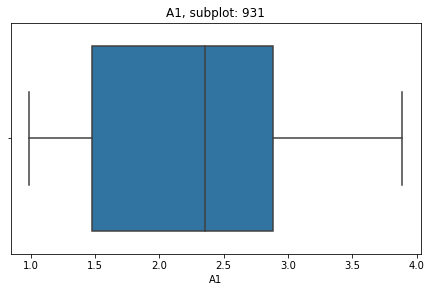

In [34]:
a=9
b=3
c=1
fig = plt.figure(figsize=(25,45))
for i in gasprice_data.columns:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(gasprice_data[i])
    c = c + 1

The above plot shows whether column have outliers or not. here we can see that there is no outlier in the column. and this blue box shows the first, second and third quantiles. the starting of the box shows the first quantile, the line in the middle of the box shows the second quantile and the ending of the box is the third quantile.

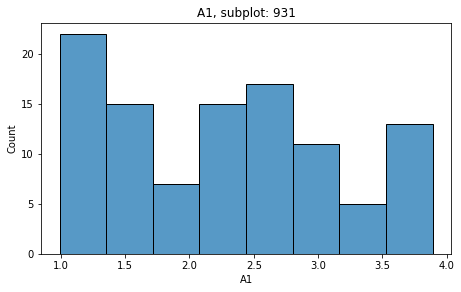

In [35]:
a=9
b=3
c=1
fig = plt.figure(figsize=(25,45))
for i in gasprice_data.columns:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.histplot(gasprice_data[i])
    c = c + 1

the Above figure shows the histogram of the column A1. here we can see that the gas price usually vary between 5 to 13.

/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


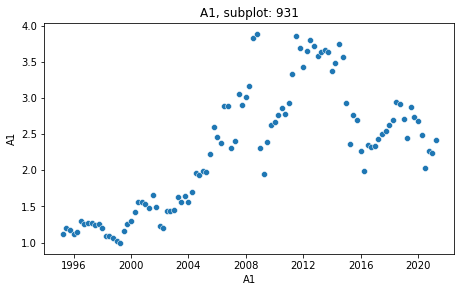

In [36]:
a=9
b=3
c=1
fig = plt.figure(figsize=(25,45))
for i in gasprice_data.columns:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.scatterplot(gasprice_data.index,gasprice_data[i])
    c = c + 1

The above plot shows the scatter plot of gas price. the general trend of price is increasing but there are some some points where the gas price decrease. in year 1999, 2003, 2008, 2016 and 2022 the price of the gas decreases.

/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


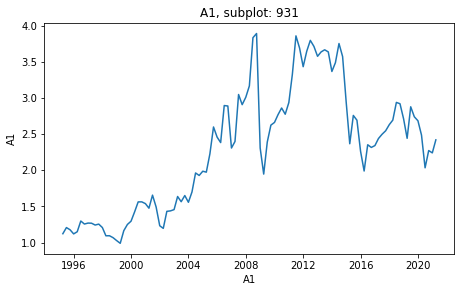

In [37]:
a=9
b=3
c=1
fig = plt.figure(figsize=(25,45))
for i in gasprice_data.columns:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.lineplot(gasprice_data.index,gasprice_data[i])
    c = c + 1

the above plot shows the line plot, which depict the same behavior as we have seen in the above scatter plot.

# Velocity of Money Data

In [38]:
velocity_data = pd.read_csv('Velocity of Money.csv')

In [39]:
velocity_data.head()

,DATE,M2V
0,2000-04-01,2.151
1,2000-07-01,2.141
2,2000-10-01,2.133
3,2001-01-01,2.085
4,2001-04-01,2.059


### EDA

checking for shape and size of the dataframe

In [40]:
velocity_data.shape

(88, 2)

Looking for null values

In [41]:
velocity_data.isnull().sum()

DATE    0
M2V     0
dtype: int64

checking the datatype of the each column. here the date is object which should datetime we will change it to date time.

In [42]:
velocity_data.dtypes

DATE     object
M2V     float64
dtype: object

In [43]:
velocity_data['DATE'] = pd.to_datetime(velocity_data['DATE'])

In [44]:
velocity_data.head()

,DATE,M2V
0,2000-04-01,2.151
1,2000-07-01,2.141
2,2000-10-01,2.133
3,2001-01-01,2.085
4,2001-04-01,2.059


Here we are checking the values of velocity dataframe, whether they are quarterly arranged or not.

In [45]:
velocity_data['DATE'].value_counts()

2000-04-01    1
2000-07-01    1
2016-04-01    1
2016-01-01    1
2015-10-01    1
             ..
2007-01-01    1
2006-10-01    1
2006-07-01    1
2006-04-01    1
2022-01-01    1
Name: DATE, Length: 88, dtype: int64

Converting Data into quaterly. Here data is quarterly arranged so we dont need to divide the sum value by 3.

In [46]:
velocity_data = pd.DataFrame(velocity_data.set_index('DATE').resample('Q')['M2V'].sum())

In [47]:
velocity_data.head()

,M2V
DATE,
2000-06-30,2.151
2000-09-30,2.141
2000-12-31,2.133
2001-03-31,2.085
2001-06-30,2.059


### Descriptive statistics

In [48]:
velocity_data.describe()

,M2V
count,88.000000
mean,1.688364
std,0.282799
min,1.112000
25%,1.458000
50%,1.710000
75%,1.954250
max,2.151000


These are the descriptive analysis of a velocity of money dataset. this describe function show 8 different characteristics of the column of the dataframe. 
- count shows the number of items in the column
- mean is the average of all values in the columns
- std is the standard deviation of the columns values
- min shows the minimum values of each column
- 25% shows the first quantile
- 50% shows the second quantile
- 75% shows the third quantile of each column
- max shows the maximum value of each column

### Basic Visualization

/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


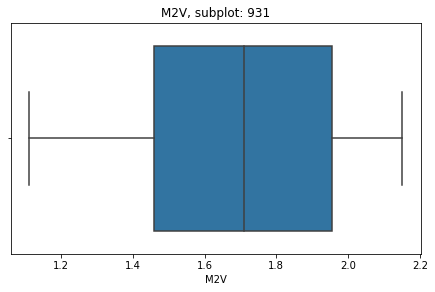

In [49]:
a=9
b=3
c=1
fig = plt.figure(figsize=(25,45))
for i in velocity_data.columns:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(velocity_data[i])
    c = c + 1

The above plot shows whether column have outliers or not. here we can see that there is no outlier in the column. and this blue box shows the first, second and third quantiles. the starting of the box shows the first quantile, the line in the middle of the box shows the second quantile and the ending of the box is the third quantile.

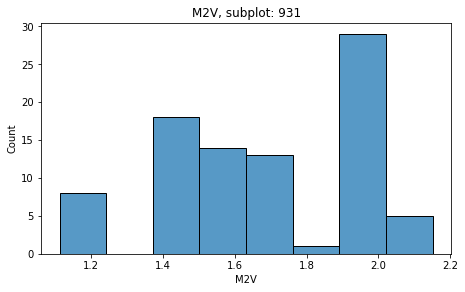

In [50]:
a=9
b=3
c=1
fig = plt.figure(figsize=(25,45))
for i in velocity_data.columns:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.histplot(velocity_data[i])
    c = c + 1

The above plot shows that the values of M2V column usually set at 2.0 but can be vary around 1.2 to 2.2

/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


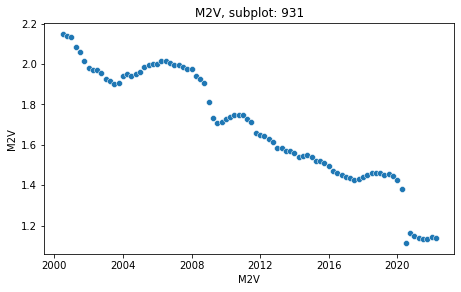

In [51]:
a=9
b=3
c=1
fig = plt.figure(figsize=(25,45))
for i in velocity_data.columns:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.scatterplot(velocity_data.index,velocity_data[i])
    c = c + 1

the above graph plot the scatter plot over M2V column against date column. this plot indicate that the velocity of money is decreasing over time. in 2000 the M2V is as high as 2.2 and in the 2022 the M2V value is as low as 1.0

/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


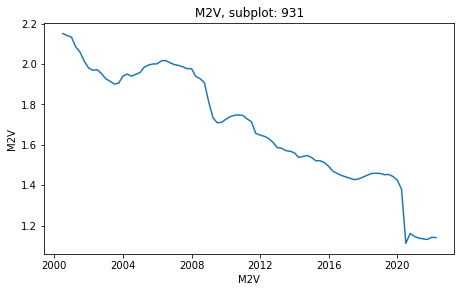

In [52]:
a=9
b=3
c=1
fig = plt.figure(figsize=(25,45))
for i in velocity_data.columns:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.lineplot(velocity_data.index,velocity_data[i])
    c = c + 1

the above graph plot the linegraph between M2V and Date column. which depict the same pattern as we observe in the scatter plot.

# All CPI Data

In [53]:
cpi_data = pd.read_excel('All CPI 2000-2022.xlsx')

/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [54]:
new_header = cpi_data.iloc[10]
cpi_data = cpi_data.iloc[11:]
cpi_data.columns = new_header
cpi_data.set_index('Year',inplace = True)
cpi_data.reset_index(inplace = True)

/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [55]:
cpi_data.head()

10,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2
0,2000.0,168.8,169.8,171.2,171.3,171.5,172.4,172.8,172.8,173.7,174.0,174.1,174.0,170.8,173.6
1,2001.0,175.1,175.8,176.2,176.9,177.7,178.0,177.5,177.5,178.3,177.7,177.4,176.7,176.6,177.5
2,2002.0,177.1,177.8,178.8,179.8,179.8,179.9,180.1,180.7,181.0,181.3,181.3,180.9,178.9,180.9
3,2003.0,181.7,183.1,184.2,183.8,183.5,183.7,183.9,184.6,185.2,185.0,184.5,184.3,183.3,184.6
4,2004.0,185.2,186.2,187.4,188.0,189.1,189.7,189.4,189.5,189.9,190.9,191.0,190.3,187.6,190.2


### EDA

Here to convert the different month columns into a single month column we use melt function, which re-arrange the months columns into a single month column. this function return two column first is the column which hold the month numbers and other column which hold the values corresponding to the month number. after that we will rename both of the column as month and cpi_value respectively.  

In [56]:
cpi_data = cpi_data.melt(id_vars = ['Year','HALF1','HALF2'])


In [57]:
cpi_data = cpi_data.rename(columns={10: "month", "value": "cpi_value"})

Now in our dataset we have year column and we have month column but we dont have date column. so we will format the year and month column and convert it datatype into datatime. and save it in Date column

In [58]:
cpi_data.head()

,Year,HALF1,HALF2,month,cpi_value
0,2000.0,170.8,173.6,Jan,168.8
1,2001.0,176.6,177.5,Jan,175.1
2,2002.0,178.9,180.9,Jan,177.1
3,2003.0,183.3,184.6,Jan,181.7
4,2004.0,187.6,190.2,Jan,185.2


In [59]:
cpi_data.Year = cpi_data.Year.astype(int)

In [60]:
cpi_data.Year = cpi_data.Year.astype(str)

In [61]:
cpi_data = cpi_data.replace({
    'Jan' : 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
   })

In [62]:
cpi_data.month = cpi_data.month.astype(str)

In [63]:
cpi_data['Date'] =pd.to_datetime(cpi_data["Year"].astype(str)+"-"+cpi_data["month"])

In [64]:
cpi_data.head()

,Year,HALF1,HALF2,month,cpi_value,Date
0,2000,170.8,173.6,1,168.8,2000-01-01
1,2001,176.6,177.5,1,175.1,2001-01-01
2,2002,178.9,180.9,1,177.1,2002-01-01
3,2003,183.3,184.6,1,181.7,2003-01-01
4,2004,187.6,190.2,1,185.2,2004-01-01


Converting Data into quaterly. since mean function doesnot work with resample method nnd data is not arranged in quarters. so we divide the sum of each quater with 3

In [65]:
cpi_data = pd.DataFrame(cpi_data.set_index('Date').resample('Q')['cpi_value','HALF1','HALF2'].sum()/3)

since we don't have data for the last quarter of 2022, we will remove this row. we are doing this because we dont want these incomplete values to become the reason for outliers

In [66]:
cpi_data= cpi_data[cpi_data['cpi_value']!=0]

In [67]:
cpi_data.head()

,cpi_value,HALF1,HALF2
Date,,,
2000-03-31,169.933333,170.8,173.6
2000-06-30,171.733333,170.8,173.6
2000-09-30,173.100000,170.8,173.6
2000-12-31,174.033333,170.8,173.6
2001-03-31,175.700000,176.6,177.5


### Descriptive statistics

In [68]:
cpi_data.describe()

,cpi_value,HALF1,HALF2
count,91.000000,91.000000,91.000000
mean,221.123674,220.953110,213.788264
std,29.756043,30.260473,48.623085
min,169.933333,170.800000,0.000000
25%,197.174500,193.200000,193.800000
50%,221.666333,223.598000,218.576000
75%,241.236500,241.427000,241.237000
max,292.572000,288.347000,275.703000


These are the descriptive analysis of a All CPI dataset. this describe function show 8 different characteristics of the column of the dataframe. 
- count shows the number of items in the column
- mean is the average of all values in the columns
- std is the standard deviation of the columns values
- min shows the minimum values of each column
- 25% shows the first quantile
- 50% shows the second quantile
- 75% shows the third quantile of each column
- max shows the maximum value of each column

### Basic Visualization

/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

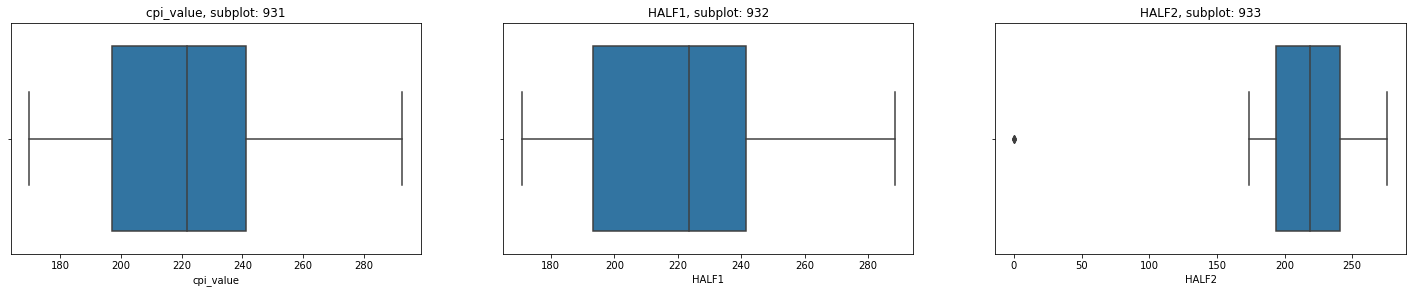

In [69]:
a=9
b=3
c=1
fig = plt.figure(figsize=(25,45))
for i in cpi_data.columns:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(cpi_data[i])
    c = c + 1

The above plot shows whether column have outliers or not. here we can see that there is no outlier in the cpi_value and HALF1 column. but HALF2 have some outliers this is because we dont have complete data for 2022 and the first second and third quarter dont have values for the second half of the year 2022. that's why there are some outlier in the HALF2. but since we are only interseted in cpi_value we will ignore this outlier and move forward with our analysis.

This blue box shows the first, second and third quantiles. the starting of the box shows the first quantile, the line in the middle of the box shows the second quantile and the ending of the box is the third quantile.

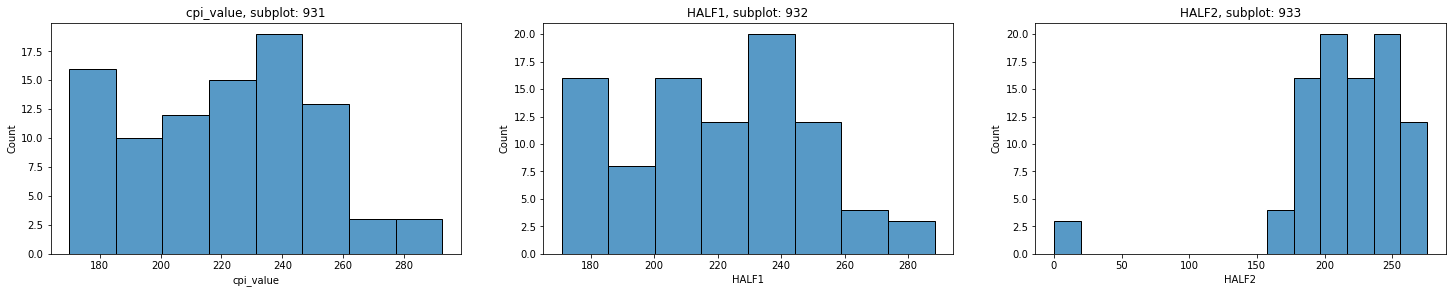

In [70]:
a=9
b=3
c=1
fig = plt.figure(figsize=(25,45))
for i in cpi_data.columns:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.histplot(cpi_data[i])
    c = c + 1

these above graphs shows the histogram of each column in the dataframe. here we can see that in cpi_value the values usually varies between 170 to 260.

/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

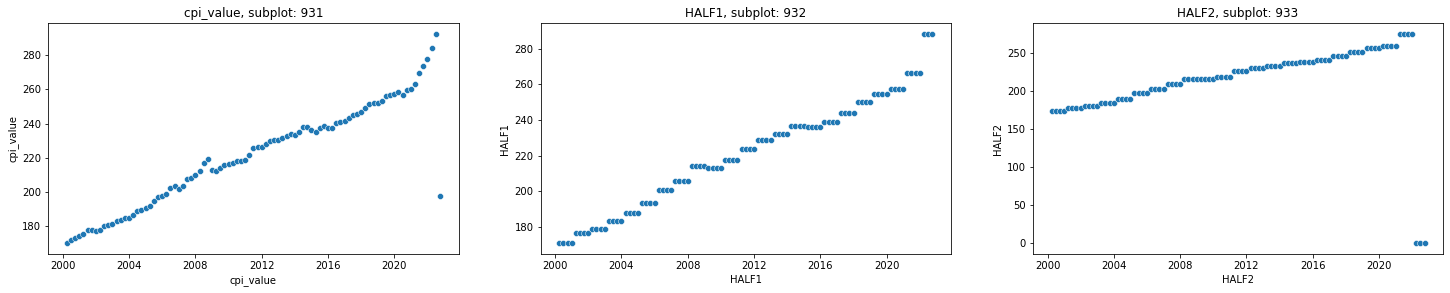

In [71]:
a=9
b=3
c=1
fig = plt.figure(figsize=(25,45))
for i in cpi_data.columns:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.scatterplot(cpi_data.index,cpi_data[i])
    c = c + 1

the above graphs plot the scatter plot for each columns against date column. Here we can see that the cpi_value have linear relationship with the date . this mean that, cpi_value increase linearly as the time progresses.

/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

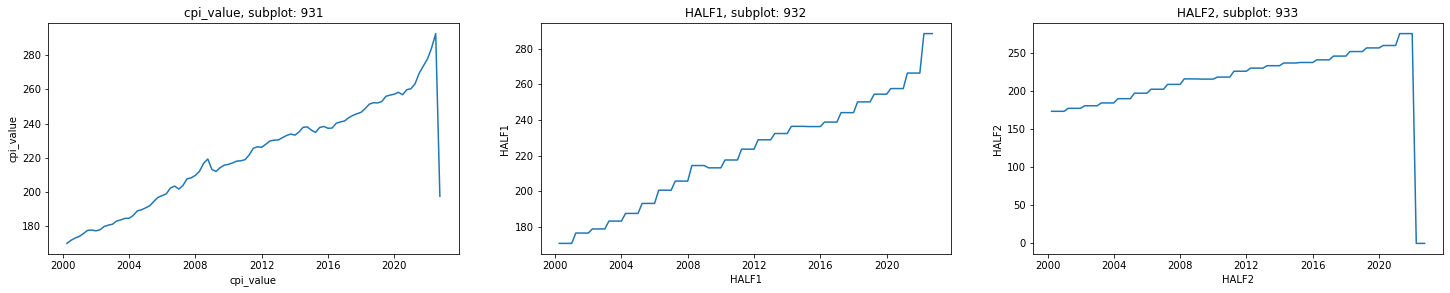

In [72]:
a=9
b=3
c=1
fig = plt.figure(figsize=(25,45))
for i in cpi_data.columns:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.lineplot(cpi_data.index,cpi_data[i])
    c = c + 1

The above graph shows the line plot for each column against the date column. here these plot depict the same behavior as we have observed in the scatter plot.

# Energy CPI Data

In [73]:
energycpi_data = pd.read_excel('Energy CPI 2000-2022.xlsx')

/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [74]:
new_header = energycpi_data.iloc[10]
energycpi_data = energycpi_data.iloc[11:]
energycpi_data.columns = new_header
energycpi_data.set_index('Year',inplace = True)
energycpi_data.reset_index(inplace = True)

/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [75]:
energycpi_data.head()

10,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2
0,2000.0,112.5,116.7,122.2,120.7,121.0,129.6,129.7,125.9,130.6,129.3,129.0,128.1,120.5,128.8
1,2001.0,132.5,132.0,129.5,133.1,140.1,140.5,132.4,129.4,132.5,122.1,116.0,111.4,134.6,124.0
2,2002.0,111.7,111.0,115.6,122.2,122.9,124.9,125.5,125.8,126.1,125.8,125.3,123.3,118.1,125.3
3,2003.0,127.5,135.4,142.6,138.1,134.0,136.5,136.8,140.6,144.6,136.9,133.1,131.8,135.7,137.3
4,2004.0,137.4,140.6,143.1,145.9,154.1,159.7,156.3,155.3,154.3,157.7,158.6,153.7,146.8,156.0


### EDA

Here to convert the different month columns into a single month column we use melt function, which re-arrange the months columns into a single month column. his function return two column first is the column which hold the month numbers and another column which hold the values corresponding to the month number. After that we will rename both of the column as month and energycpi_value respectively.

In [76]:
energycpi_data = energycpi_data.melt(id_vars = ['Year','HALF1','HALF2'])

In [77]:
energycpi_data = energycpi_data.rename(columns={10: "month", "value": "energycpi_value"})

Now in our dataset we have year column and we have month column but we dont have date column. so we will format the year and month column and convert it datatype into datatime. and save it in Date column

In [78]:
energycpi_data.head()

,Year,HALF1,HALF2,month,energycpi_value
0,2000.0,120.5,128.8,Jan,112.5
1,2001.0,134.6,124.0,Jan,132.5
2,2002.0,118.1,125.3,Jan,111.7
3,2003.0,135.7,137.3,Jan,127.5
4,2004.0,146.8,156.0,Jan,137.4


In [79]:
energycpi_data.Year = energycpi_data.Year.astype(int)

In [80]:
energycpi_data.Year = energycpi_data.Year.astype(str)

In [81]:
energycpi_data = energycpi_data.replace({
    'Jan' : 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
   })

In [82]:
energycpi_data.month = energycpi_data.month.astype(str)

In [83]:
energycpi_data['Date'] =pd.to_datetime(energycpi_data["Year"].astype(str)+"-"+energycpi_data["month"])

In [84]:
energycpi_data.head()

,Year,HALF1,HALF2,month,energycpi_value,Date
0,2000,120.5,128.8,1,112.5,2000-01-01
1,2001,134.6,124.0,1,132.5,2001-01-01
2,2002,118.1,125.3,1,111.7,2002-01-01
3,2003,135.7,137.3,1,127.5,2003-01-01
4,2004,146.8,156.0,1,137.4,2004-01-01


Converting Data into quaterly. since mean function doesnot work with resample method nnd data is not arranged in quarters. so we divide the sum of each quater with 3

In [85]:
energycpi_data = pd.DataFrame(energycpi_data.set_index('Date').resample('Q')['energycpi_value','HALF1','HALF2'].sum()/3)

In [86]:
energycpi_data.head()

,energycpi_value,HALF1,HALF2
Date,,,
2000-03-31,117.133333,120.5,128.8
2000-06-30,123.766667,120.5,128.8
2000-09-30,128.733333,120.5,128.8
2000-12-31,128.800000,120.5,128.8
2001-03-31,131.333333,134.6,124.0


since we don't have data for the last quarter of 2022, we will remove this row. we are doing this because we dont want these incomplete values to become the reason for outliers

In [87]:
energycpi_data= energycpi_data[energycpi_data['energycpi_value']!=0]

### Descriptive statistics

In [88]:
energycpi_data.describe()

,energycpi_value,HALF1,HALF2
count,91.000000,91.000000,91.000000
mean,199.249498,198.199253,192.425187
std,43.657600,44.631381,53.001770
min,112.766667,118.100000,0.000000
25%,177.011000,163.300000,173.400000
50%,207.333333,202.062000,202.446000
75%,225.831333,232.649000,232.965000
max,318.715667,297.136000,251.719000


These are the descriptive analysis of a Energy CPI dataset. this describe function show 8 different characteristics of the column of the dataframe. 
- count shows the number of items in the column
- mean is the average of all values in the columns
- std is the standard deviation of the columns values
- min shows the minimum values of each column
- 25% shows the first quantile
- 50% shows the second quantile
- 75% shows the third quantile of each column
- max shows the maximum value of each column

### Basic Visualization

/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

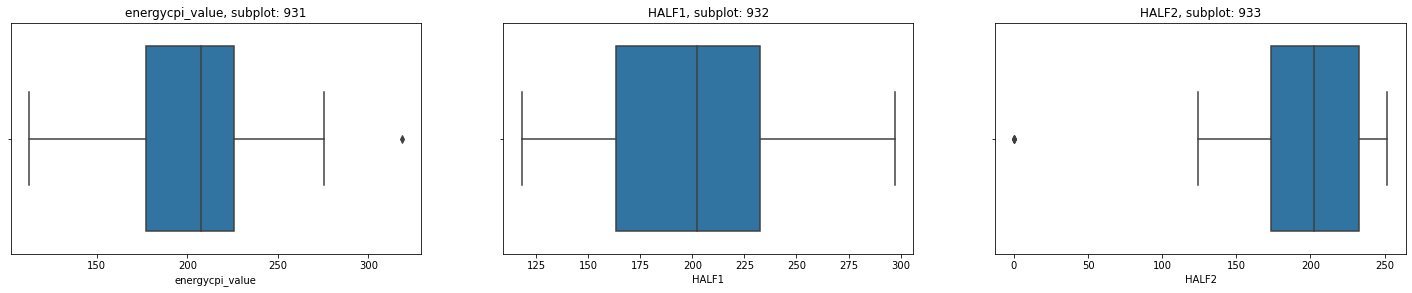

In [89]:
a=9
b=3
c=1
fig = plt.figure(figsize=(25,45))
for i in energycpi_data.columns:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(energycpi_data[i])
    c = c + 1

The above plot shows whether column have outliers or not. here we can see that there is only one outlier in the energycpi_value (this outlier depict some behavior of the data so we will not remove it) and no outlier in HALF1 column. HALF2 have some outliers this is because we dont have complete data for 2022 and the first second and third quarter dont have values for the second half of the year 2022. that's why there are some outlier in the HALF2. but since we are only interseted in energycpi_value we will ignore this outlier and move forward with our analysis.

This blue box shows the first, second and third quantiles. the starting of the box shows the first quantile, the line in the middle of the box shows the second quantile and the ending of the box is the third quantile.

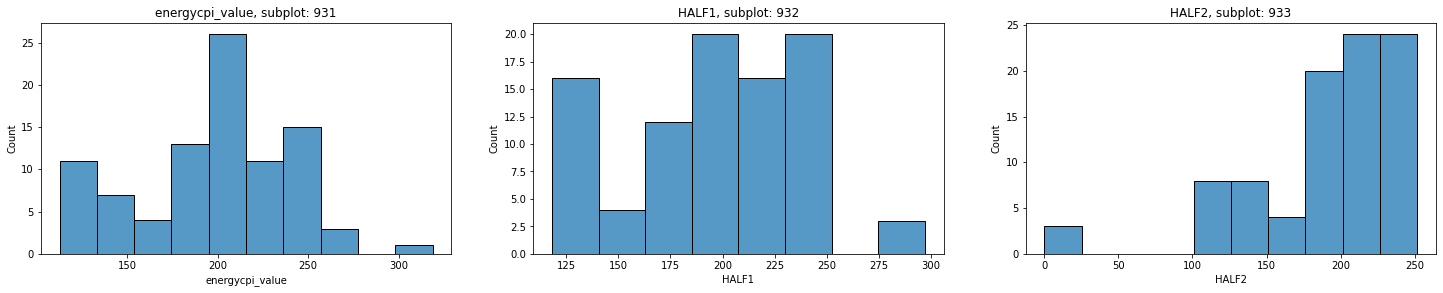

In [90]:
a=9
b=3
c=1
fig = plt.figure(figsize=(25,45))
for i in energycpi_data.columns:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.histplot(energycpi_data[i])
    c = c + 1

these above graphs shows the histogram of each column in the dataframe. here we can see that in energycpi_value the values usually varies between 100 to 250.

/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

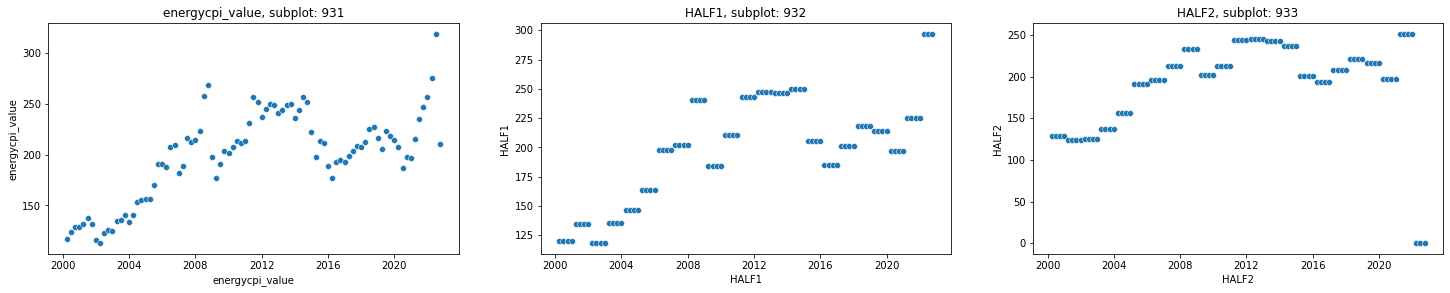

In [91]:
a=9
b=3
c=1
fig = plt.figure(figsize=(25,45))
for i in energycpi_data.columns:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.scatterplot(energycpi_data.index,energycpi_data[i])
    c = c + 1

the above graphs plot the scatter plot for each columns against date column. Here we can see that the enegycpi_value increases over time. but the relationship is not linear with the date columns.

/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

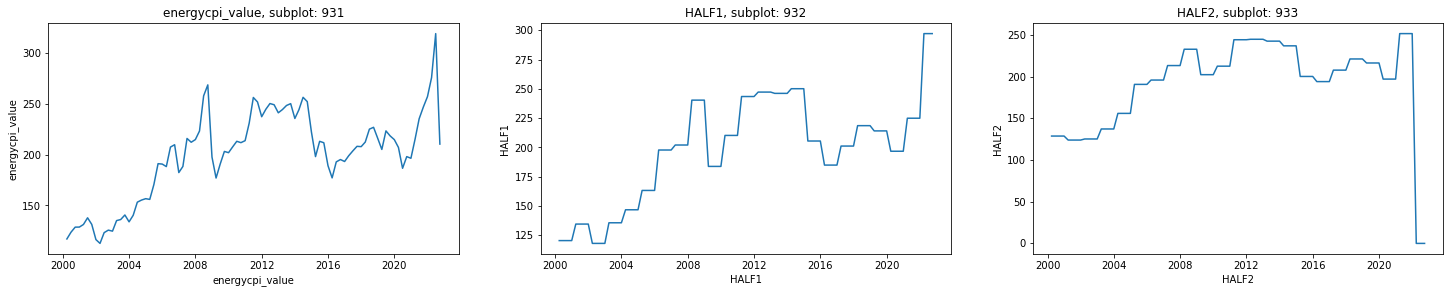

In [92]:
a=9
b=3
c=1
fig = plt.figure(figsize=(25,45))
for i in energycpi_data.columns:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.lineplot(energycpi_data.index,energycpi_data[i])
    c = c + 1

The above graph shows the lineplot for all columns against the date column. these graphs depict the same behavior that we have observed in the above scatter plot

# Food CPI Data

In [93]:
foodcpi_data = pd.read_excel('Food CPI 2000-2022.xlsx')

/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [94]:
new_header = foodcpi_data.iloc[10]
foodcpi_data = foodcpi_data.iloc[11:]
foodcpi_data.columns = new_header
foodcpi_data.set_index('Year',inplace = True)
foodcpi_data.reset_index(inplace = True)

/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [95]:
foodcpi_data.head()

10,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2
0,2000.0,166.1,166.3,166.5,166.6,167.3,167.3,168.1,168.7,168.9,169.1,168.9,170.0,166.7,169.0
1,2001.0,170.9,171.3,171.7,171.9,172.5,173.0,173.5,173.9,174.1,174.9,174.6,174.7,171.9,174.3
2,2002.0,175.8,175.9,176.1,176.2,175.8,175.8,176.0,176.0,176.4,176.5,176.8,177.3,175.9,176.5
3,2003.0,177.5,178.3,178.6,178.4,178.8,179.6,179.7,180.4,180.7,181.7,182.4,183.6,178.5,181.4
4,2004.0,183.8,184.1,184.4,184.5,186.1,186.3,186.8,186.8,186.7,187.9,188.2,188.5,184.9,187.5


### EDA

Here to convert the different month columns into a single month column we use melt function, which re-arrange the months columns into a single month column. this function return two column first is the column which hold the month numbers and other column which hold the values corresponding to the month number. after that we will rename both of the column as month and foodcpi_value respectively.

In [96]:
foodcpi_data = foodcpi_data.melt(id_vars = ['Year','HALF1','HALF2'])

In [97]:
foodcpi_data = foodcpi_data.rename(columns={10: "month", "value": "foodcpi_value"})

Now in our dataset we have year column and we have month column but we dont have date column. so we will format the year and month column and convert it datatype into datatime. and save it in Date column

In [98]:
foodcpi_data.Year = foodcpi_data.Year.astype(int)

In [99]:
foodcpi_data.Year = foodcpi_data.Year.astype(str)

In [100]:
foodcpi_data = foodcpi_data.replace({
    'Jan' : 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
   })

In [101]:
foodcpi_data.month = foodcpi_data.month.astype(str)

In [102]:
foodcpi_data['Date'] =pd.to_datetime(foodcpi_data["Year"].astype(str)+"-"+foodcpi_data["month"])

In [103]:
foodcpi_data.head()

,Year,HALF1,HALF2,month,foodcpi_value,Date
0,2000,166.7,169.0,1,166.1,2000-01-01
1,2001,171.9,174.3,1,170.9,2001-01-01
2,2002,175.9,176.5,1,175.8,2002-01-01
3,2003,178.5,181.4,1,177.5,2003-01-01
4,2004,184.9,187.5,1,183.8,2004-01-01


Converting Data into quaterly. since mean function doesnot work with resample method nnd data is not arranged in quarters. so we divide the sum of each quater with 3

In [104]:
foodcpi_data = pd.DataFrame(foodcpi_data.set_index('Date').resample('Q')['foodcpi_value','HALF1','HALF2'].sum()/3)

In [105]:
foodcpi_data.head()

,foodcpi_value,HALF1,HALF2
Date,,,
2000-03-31,166.300000,166.7,169.0
2000-06-30,167.066667,166.7,169.0
2000-09-30,168.566667,166.7,169.0
2000-12-31,169.333333,166.7,169.0
2001-03-31,171.300000,171.9,174.3


since we don't have data for the last quarter of 2022, we will remove this row. we are doing this because we dont want these incomplete values to become the reason for outliers

In [106]:
foodcpi_data= foodcpi_data[foodcpi_data['foodcpi_value']!=0]

### Descriptive statistics

In [107]:
foodcpi_data.describe()

,foodcpi_value,HALF1,HALF2
count,91.000000,91.00000,91.000000
mean,222.748158,222.48700,215.211473
std,33.992268,34.65578,51.335416
min,166.300000,166.70000,0.000000
25%,191.750000,189.70000,189.650000
50%,224.020333,225.42500,220.168000
75%,248.445000,248.73100,248.095000
max,301.930000,297.34700,282.574000


These are the descriptive analysis of a Food CPI dataset. this describe function show 8 different characteristics of the column of the dataframe. 
- count shows the number of items in the column
- mean is the average of all values in the columns
- std is the standard deviation of the columns values
- min shows the minimum values of each column
- 25% shows the first quantile
- 50% shows the second quantile
- 75% shows the third quantile of each column
- max shows the maximum value of each column

### Basic Visualization

/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

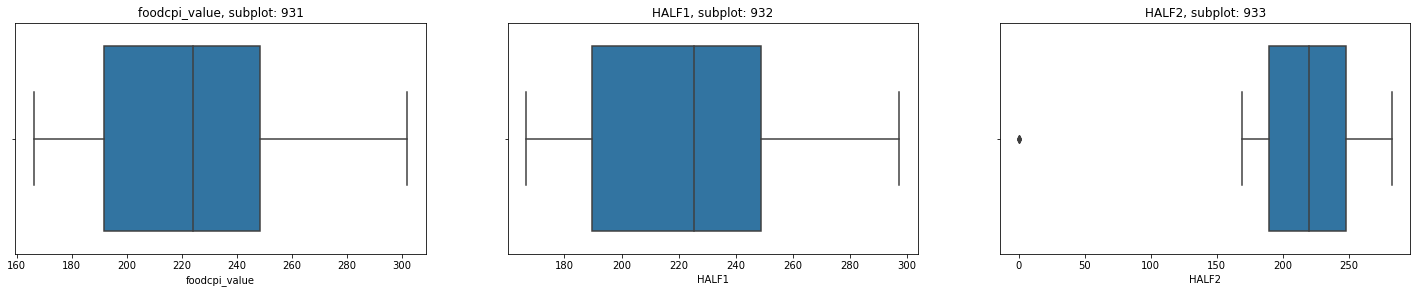

In [108]:
a=9
b=3
c=1
fig = plt.figure(figsize=(25,45))
for i in foodcpi_data.columns:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(foodcpi_data[i])
    c = c + 1

The above plot shows whether column have outliers or not. here we can see that there is no outlier in the foodcpi_value and HALF1 column. but HALF2 have some outliers this is because we dont have complete data for 2022 and the first second and third quarter dont have values for the second half of the year 2022. that's why there are some outlier in the HALF2. but since we are only interseted in cpi_value we will ignore this outlier and move forward with our analysis.

This blue box shows the first, second and third quantiles. the starting of the box shows the first quantile, the line in the middle of the box shows the second quantile and the ending of the box is the third quantile.

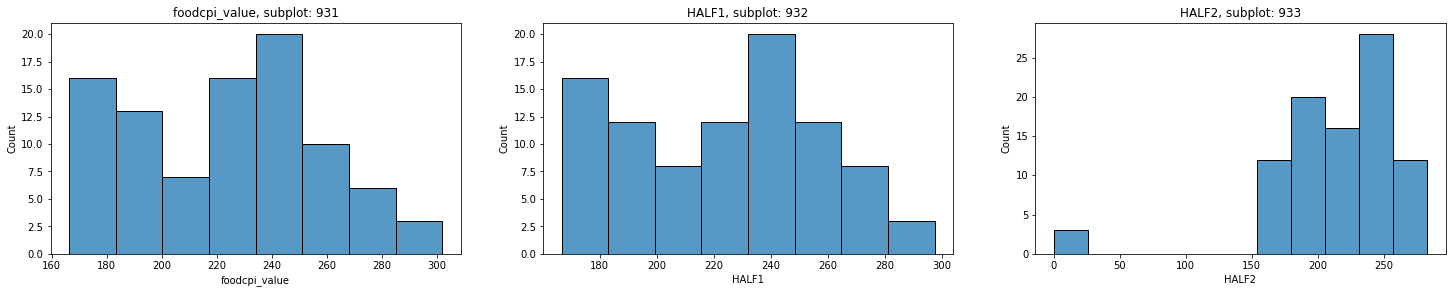

In [109]:
a=9
b=3
c=1
fig = plt.figure(figsize=(25,45))
for i in foodcpi_data.columns:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.histplot(foodcpi_data[i])
    c = c + 1

The above graphs plot the histogram for each of the columns. and the values of foodcpi_values usually varies between 160 to 260.

/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

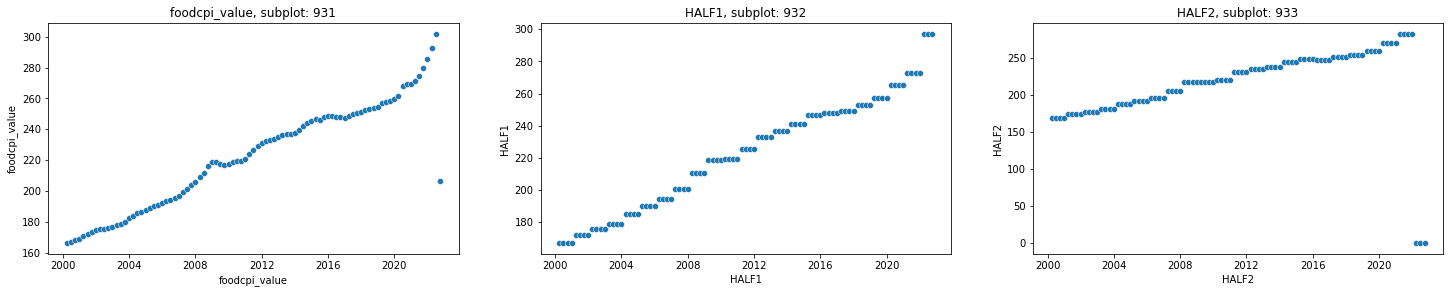

In [110]:
a=9
b=3
c=1
fig = plt.figure(figsize=(25,45))
for i in foodcpi_data.columns:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.scatterplot(foodcpi_data.index,foodcpi_data[i])
    c = c + 1

the above graphs plot the scatter plot for each columns against date column. Here we can see that the foodcpi_value have linear relationship with the date . this mean that, foodcpi_value increase linearly as the time progresses.

/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

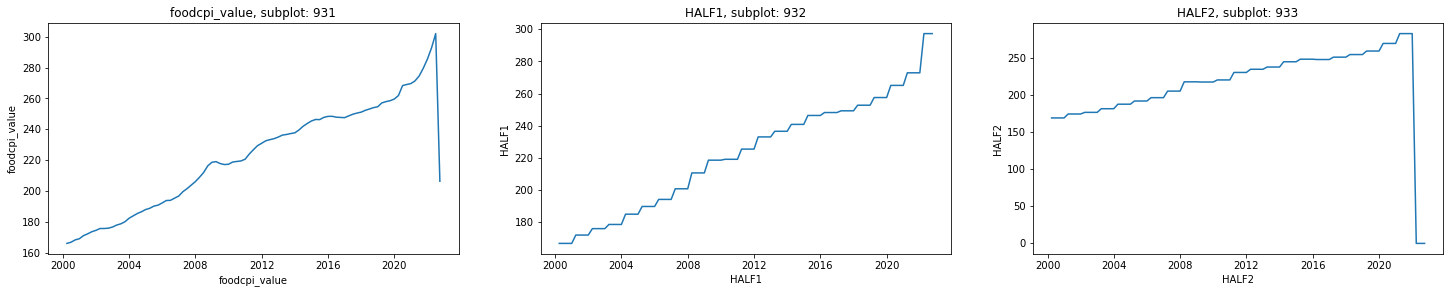

In [111]:
a=9
b=3
c=1
fig = plt.figure(figsize=(25,45))
for i in foodcpi_data.columns:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.lineplot(foodcpi_data.index,foodcpi_data[i])
    c = c + 1

The above graph shows the lineplot for each column against the date column. and these graphs depict the same behavior that we have observe in the above scatter plot.

# Unemployment Rate Data

In [112]:
unemployment_data = pd.read_excel('Unemployment Rate.xlsx')

/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [113]:
new_header = unemployment_data.iloc[10]
unemployment_data = unemployment_data.iloc[11:]
unemployment_data.columns = new_header
unemployment_data.set_index('Year',inplace = True)
unemployment_data.reset_index(inplace = True)

/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [114]:
unemployment_data.head()

10,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2000.0,4.0,4.1,4.0,3.8,4.0,4.0,4.0,4.1,3.9,3.9,3.9,3.9
1,2001.0,4.2,4.2,4.3,4.4,4.3,4.5,4.6,4.9,5.0,5.3,5.5,5.7
2,2002.0,5.7,5.7,5.7,5.9,5.8,5.8,5.8,5.7,5.7,5.7,5.9,6.0
3,2003.0,5.8,5.9,5.9,6.0,6.1,6.3,6.2,6.1,6.1,6.0,5.8,5.7
4,2004.0,5.7,5.6,5.8,5.6,5.6,5.6,5.5,5.4,5.4,5.5,5.4,5.4


### EDA

Here to convert the different month columns into a single month column we use melt function, which re-arrange the months columns into a single month column. this function return two column first is the column which hold the month numbers and other column which hold the values corresponding to the month number. after that we will rename both of the column as month and unemployment_rate respectively.

In [115]:
unemployment_data = unemployment_data.melt(id_vars = ['Year'])

In [116]:
unemployment_data = unemployment_data.rename(columns={10: "month", "value": "unemployment_rate"})

Now in our dataset we have year column and we have month column but we dont have date column. so we will format the year and month column and convert it datatype into datatime. and save it in Date column

In [117]:
unemployment_data.Year = unemployment_data.Year.astype(int)

In [118]:
unemployment_data.Year = unemployment_data.Year.astype(str)

In [119]:
unemployment_data = unemployment_data.replace({
    'Jan' : 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
   })

In [120]:
unemployment_data.month = unemployment_data.month.astype(str)

In [121]:
unemployment_data['Date'] =pd.to_datetime(unemployment_data["Year"].astype(str)+"-"+unemployment_data["month"])

In [122]:
unemployment_data.head()

,Year,month,unemployment_rate,Date
0,2000,1,4.0,2000-01-01
1,2001,1,4.2,2001-01-01
2,2002,1,5.7,2002-01-01
3,2003,1,5.8,2003-01-01
4,2004,1,5.7,2004-01-01


Converting Data into quaterly. since mean function doesnot work with resample method nnd data is not arranged in quarters. so we divide the sum of each quater with 3

In [123]:
unemployment_data = pd.DataFrame(unemployment_data.set_index('Date').resample('Q')['unemployment_rate'].sum()/3)

In [124]:
unemployment_data.head()

,unemployment_rate
Date,
2000-03-31,4.033333
2000-06-30,3.933333
2000-09-30,4.000000
2000-12-31,3.900000
2001-03-31,4.233333


since we don't have data for the last quarter of 2022, we will remove this row. we are doing this because we dont want these incomplete values to become the reason for outliers

In [125]:
unemployment_data= unemployment_data[unemployment_data['unemployment_rate']!=0]

### Descriptive statistics

In [126]:
unemployment_data.describe()

,unemployment_rate
count,91.000000
mean,5.869231
std,1.969033
min,2.400000
25%,4.466667
50%,5.433333
75%,6.816667
max,12.966667


These are the descriptive analysis of a Unemployment Rate dataset. this describe function show 8 different characteristics of the column of the dataframe. 
- count shows the number of items in the column
- mean is the average of all values in the columns
- std is the standard deviation of the columns values
- min shows the minimum values of each column
- 25% shows the first quantile
- 50% shows the second quantile
- 75% shows the third quantile of each column
- max shows the maximum value of each column

### Basic Visualization

/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


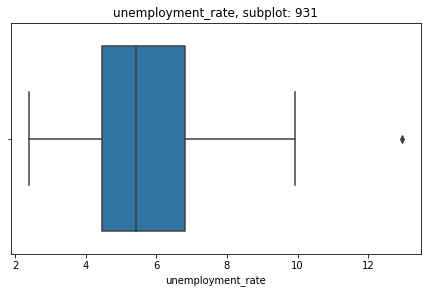

In [127]:
a=9
b=3
c=1
fig = plt.figure(figsize=(25,45))
for i in unemployment_data.columns:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(unemployment_data[i])
    c = c + 1

The above plot shows whether column have outliers or not. here we can see that there is only one outlier in the unemployment_rate. this outlier depict some behavior of the data so we will not remove it and move forward with our analysis.

This blue box shows the first, second and third quantiles. the starting of the box shows the first quantile, the line in the middle of the box shows the second quantile and the ending of the box is the third quantile.

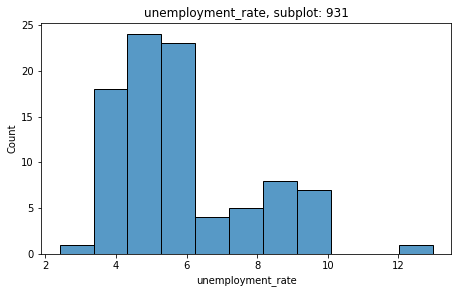

In [128]:
a=9
b=3
c=1
fig = plt.figure(figsize=(25,45))
for i in unemployment_data.columns:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.histplot(unemployment_data[i])
    c = c + 1

the above graph plot the histogram for the column unemployment_rate. the values of this columns mostly varies between 4 to 10.

/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


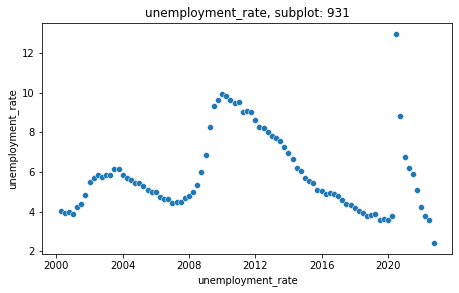

In [129]:
a=9
b=3
c=1
fig = plt.figure(figsize=(25,45))
for i in unemployment_data.columns:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.scatterplot(unemployment_data.index,unemployment_data[i])
    c = c + 1

the above graph is the scatter plot betwwen unemployment_rate column and date column. from this graph we can see that the unemployment_rate increase in 2011 and in 2021.

/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


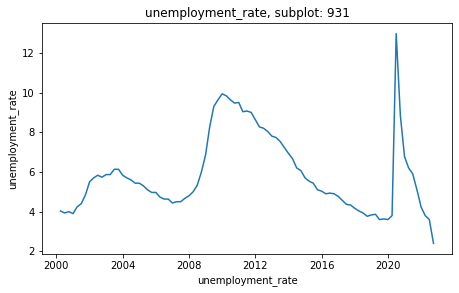

In [130]:
a=9
b=3
c=1
fig = plt.figure(figsize=(25,45))
for i in unemployment_data.columns:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.lineplot(unemployment_data.index,unemployment_data[i])
    c = c + 1

The above graph plot the lineplot between unemployment_rate and date column. and this graph depict the same pattern as we have observe in the above scatter plot.

## Merging Datasets

After all data cleaning and basic visualization, now we will merge the data into one data frame. 

In [131]:
gasprice_data.reset_index(inplace=True)

In [132]:
data = pd.merge(gasprice_data,freight_data, left_on='Date', right_on='Month_of_Date',how ='inner')

In [133]:
data = pd.merge(data,velocity_data, left_on='Date', right_on='DATE',how ='inner')

In [134]:
data = pd.merge(data,cpi_data, left_on='Date', right_on='Date',how ='inner')

In [135]:
data = pd.merge(data,energycpi_data, left_on='Date', right_on='Date',how ='inner')

In [136]:
data = pd.merge(data,foodcpi_data, left_on='Date', right_on='Date',how ='inner')

In [137]:
data = pd.merge(data,unemployment_data, left_on='Date', right_on='Date',how ='inner')

In [138]:
data.head()

,Date,A1,TSI_FREIGHT,GDP,M2V,cpi_value,HALF1_x,HALF2_x,energycpi_value,HALF1_y,HALF2_y,foodcpi_value,HALF1,HALF2,unemployment_rate
0,2000-06-30,1.563077,98.800000,100.249000,2.151,171.733333,170.8,173.6,123.766667,120.5,128.8,167.066667,166.7,169.0,3.933333
1,2000-09-30,1.563538,99.000000,100.349023,2.141,173.100000,170.8,173.6,128.733333,120.5,128.8,168.566667,166.7,169.0,4.000000
2,2000-12-31,1.539308,99.533333,100.945459,2.133,174.033333,170.8,173.6,128.800000,120.5,128.8,169.333333,166.7,169.0,3.900000
3,2001-03-31,1.476308,99.433333,100.618173,2.085,175.700000,176.6,177.5,131.333333,134.6,124.0,171.300000,171.9,174.3,4.233333
4,2001-06-30,1.656538,98.700000,101.243403,2.059,177.533333,176.6,177.5,137.900000,134.6,124.0,172.466667,171.9,174.3,4.400000


After merging we will select only required columns and save it in data variable

In [139]:
data = data[['Date','A1','M2V','cpi_value','energycpi_value','foodcpi_value','unemployment_rate','TSI_FREIGHT','GDP']]

In [140]:
data.head()

,Date,A1,M2V,cpi_value,energycpi_value,foodcpi_value,unemployment_rate,TSI_FREIGHT,GDP
0,2000-06-30,1.563077,2.151,171.733333,123.766667,167.066667,3.933333,98.800000,100.249000
1,2000-09-30,1.563538,2.141,173.100000,128.733333,168.566667,4.000000,99.000000,100.349023
2,2000-12-31,1.539308,2.133,174.033333,128.800000,169.333333,3.900000,99.533333,100.945459
3,2001-03-31,1.476308,2.085,175.700000,131.333333,171.300000,4.233333,99.433333,100.618173
4,2001-06-30,1.656538,2.059,177.533333,137.900000,172.466667,4.400000,98.700000,101.243403


## Descriptive Analysis on Final Merge DataFrame

In [141]:
data.shape

(84, 9)

In [142]:
data.dtypes

Date                 datetime64[ns]
A1                          float64
M2V                         float64
cpi_value                   float64
energycpi_value             float64
foodcpi_value               float64
unemployment_rate           float64
TSI_FREIGHT                 float64
GDP                         float64
dtype: object

In [143]:
data.isnull().sum()

Date                 0
A1                   0
M2V                  0
cpi_value            0
energycpi_value      0
foodcpi_value        0
unemployment_rate    0
TSI_FREIGHT          0
GDP                  0
dtype: int64

In [144]:
data.apply(lambda x: print(x.value_counts(),'\n'))

2000-06-30    1
2013-09-30    1
2015-09-30    1
2015-06-30    1
2015-03-31    1
             ..
2006-12-31    1
2006-09-30    1
2006-06-30    1
2006-03-31    1
2021-03-31    1
Name: Date, Length: 84, dtype: int64 

1.563077    1
3.635929    1
2.691846    1
2.757846    1
2.366538    1
           ..
2.307615    1
2.888154    1
2.894538    1
2.382769    1
2.420250    1
Name: A1, Length: 84, dtype: int64 

1.458    3
1.977    2
1.521    2
1.940    2
1.927    2
        ..
1.993    1
1.997    1
2.006    1
2.017    1
1.138    1
Name: M2V, Length: 78, dtype: int64 

171.733333    1
233.874000    1
238.305000    1
237.680667    1
234.849333    1
             ..
201.700000    1
203.433333    1
202.300000    1
198.933333    1
263.157667    1
Name: cpi_value, Length: 84, dtype: int64 

123.766667    1
249.964667    1
211.580333    1
212.968667    1
197.982333    1
             ..
182.300000    1
209.633333    1
207.333333    1
188.166667    1
214.803667    1
Name: energycpi_value, Length: 84, dtyp

Date                 None
A1                   None
M2V                  None
cpi_value            None
energycpi_value      None
foodcpi_value        None
unemployment_rate    None
TSI_FREIGHT          None
GDP                  None
dtype: object

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 0 to 83
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               84 non-null     datetime64[ns]
 1   A1                 84 non-null     float64       
 2   M2V                84 non-null     float64       
 3   cpi_value          84 non-null     float64       
 4   energycpi_value    84 non-null     float64       
 5   foodcpi_value      84 non-null     float64       
 6   unemployment_rate  84 non-null     float64       
 7   TSI_FREIGHT        84 non-null     float64       
 8   GDP                84 non-null     float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 6.6 KB


In [146]:
data.describe()

,A1,M2V,cpi_value,energycpi_value,foodcpi_value,unemployment_rate,TSI_FREIGHT,GDP
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,2.559756,1.714631,218.540746,196.089802,219.797230,6.012302,114.996032,122.095203
std,0.724554,0.261661,26.567851,40.612667,30.808981,1.960799,12.061883,13.413910
min,1.197333,1.112000,171.733333,112.766667,167.066667,3.600000,95.533333,100.249000
25%,1.989173,1.487000,196.275000,175.345917,190.875000,4.616667,106.983333,113.617788
50%,2.521423,1.720000,219.087667,204.279000,220.167833,5.466667,111.966667,120.119498
75%,2.936442,1.960750,238.109500,222.366917,247.739667,7.008333,122.966667,132.770650
max,3.889846,2.151000,263.157667,268.378667,271.371000,12.966667,140.300000,146.158156


These are the descriptive analysis of an final Dataframe dataset. this describe function show 8 different characteristics of the column of the dataframe. 
- count shows the number of items in the column
- mean is the average of all values in the columns
- std is the standard deviation of the columns values
- min shows the minimum values of each column
- 25% shows the first quantile
- 50% shows the second quantile
- 75% shows the third quantile of each column
- max shows the maximum value of each column

## Basic Visualization

There is some basic visualization that we have did before. we are doing this again because we want to see how the the values of diffferent column changes after merging.

/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

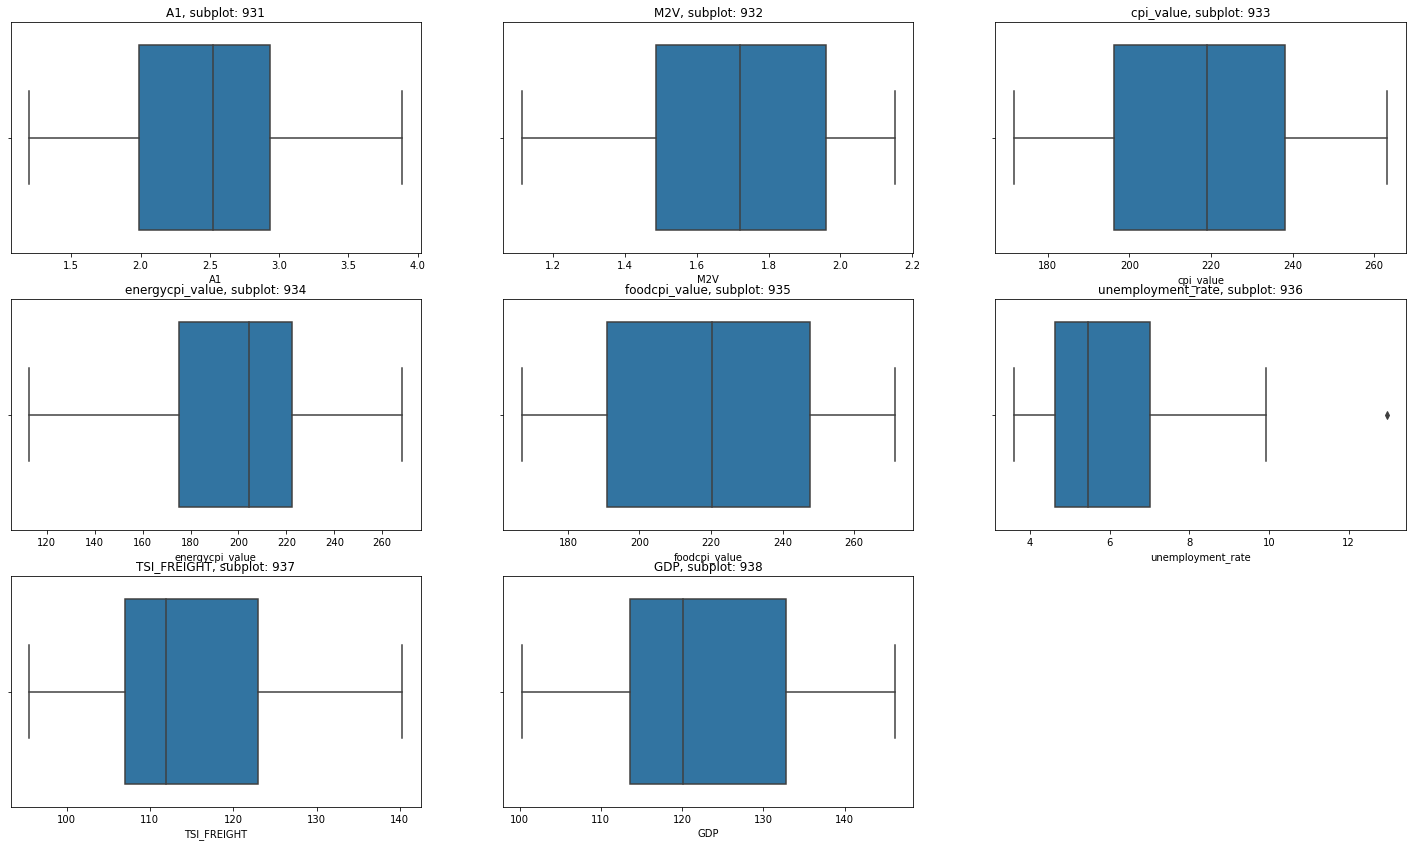

In [147]:
a=9
b=3
c=1
fig = plt.figure(figsize=(25,45))
for i in data.columns[1:]:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(data[i])
    c = c + 1

After merging, the outliers in the energycpi_values has been removed.

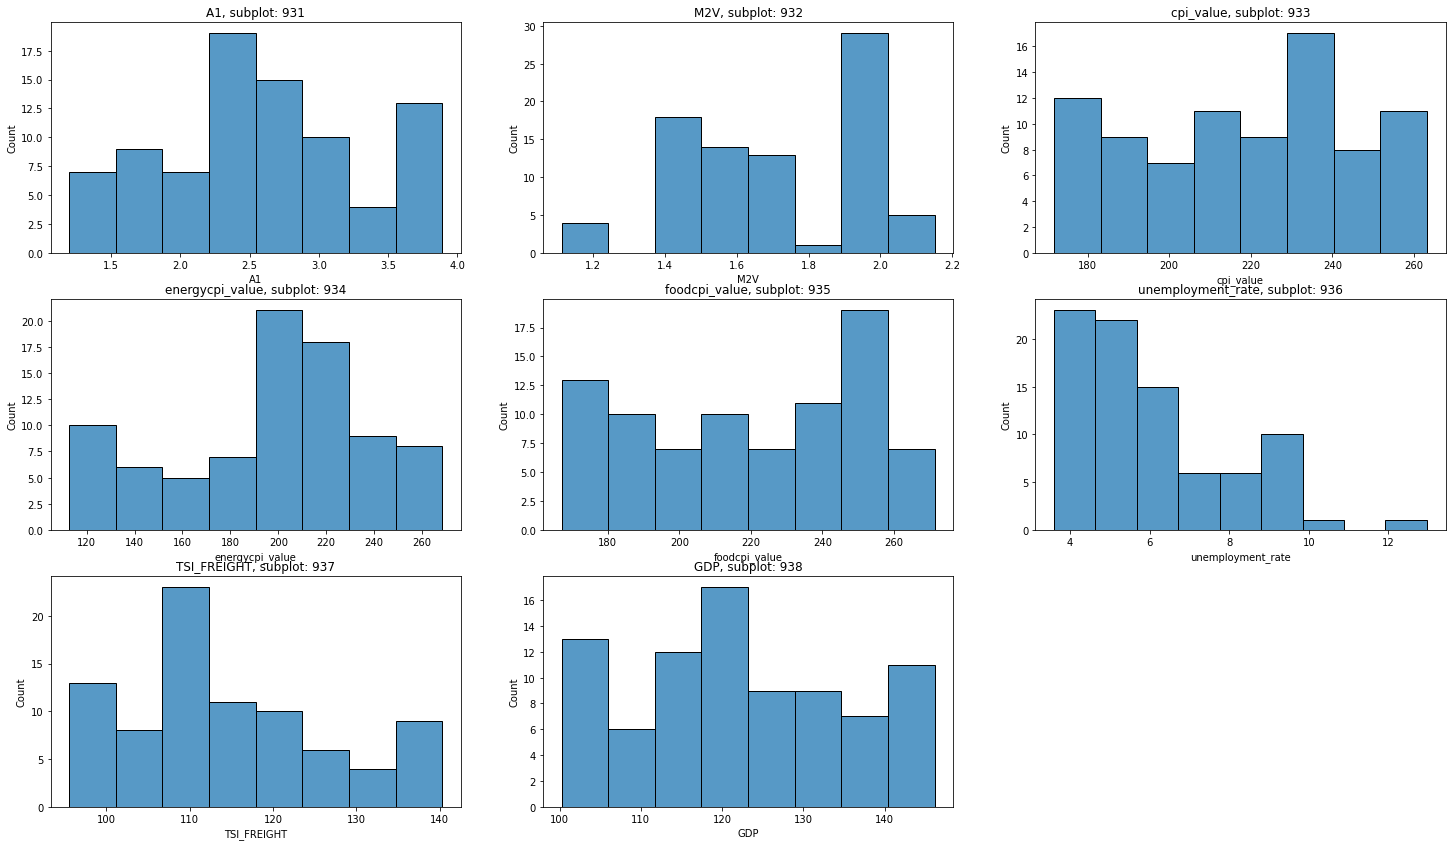

In [148]:
a=9
b=3
c=1
fig = plt.figure(figsize=(25,45))
for i in data.columns[1:]:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.histplot(data[i])
    c = c + 1

/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

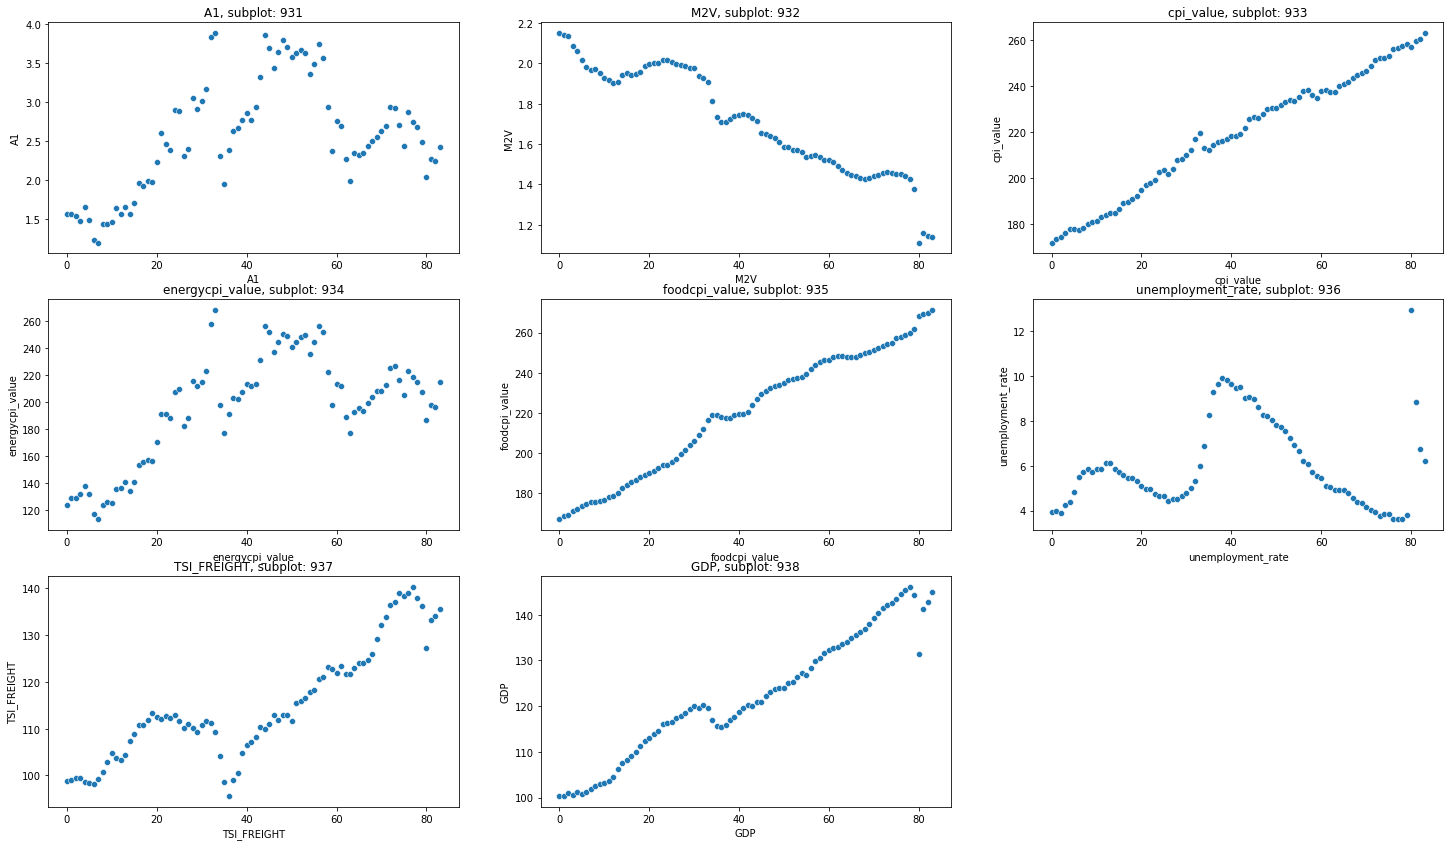

In [149]:
a=9
b=3
c=1
fig = plt.figure(figsize=(25,45))
for i in data.columns[1:]:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.scatterplot(data.index,data[i])
    c = c + 1

These are just same scatter plots that we have oberved earlier.

/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

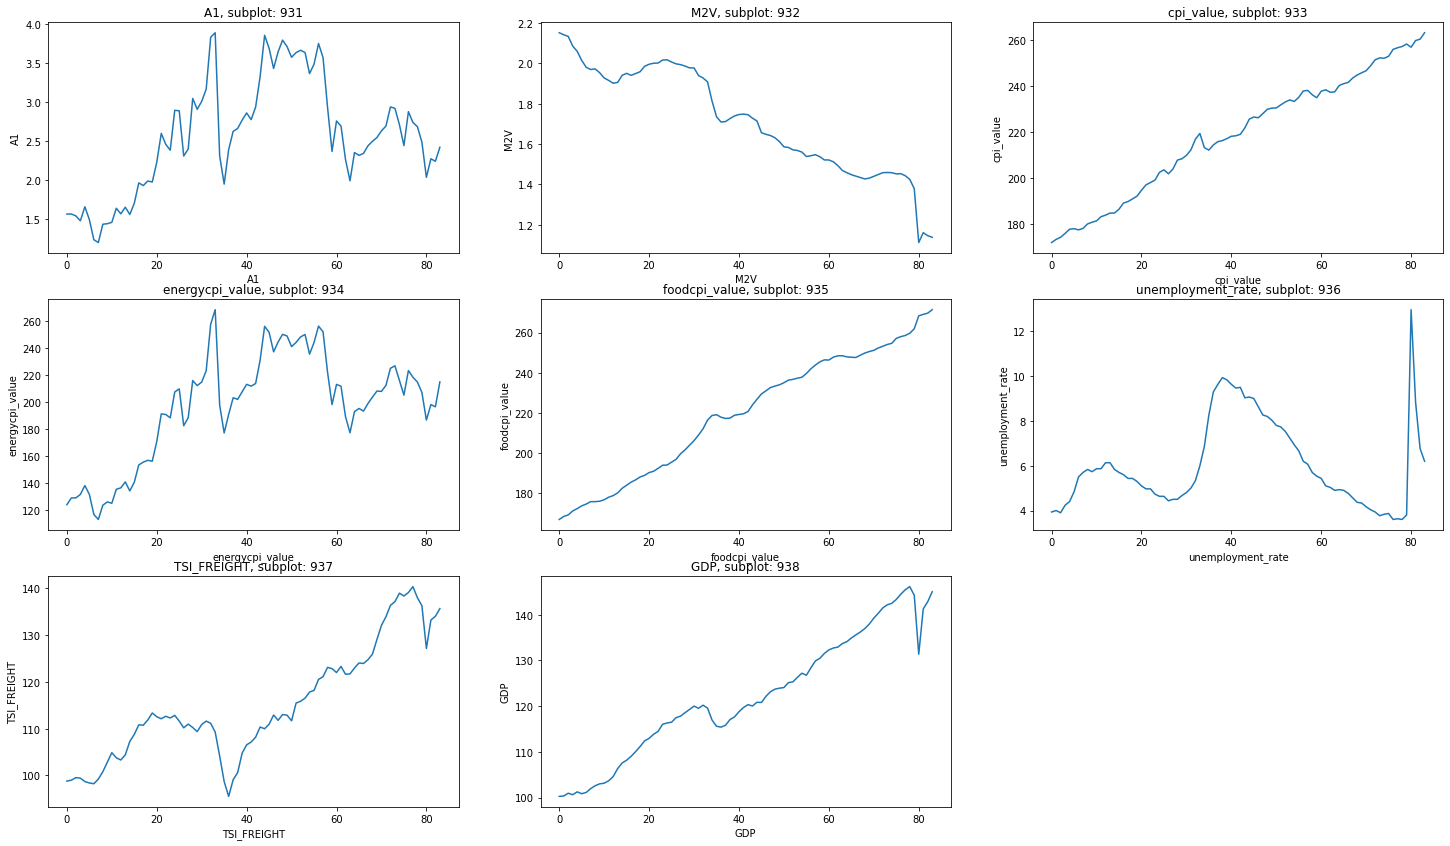

In [150]:
a=9
b=3
c=1
fig = plt.figure(figsize=(25,45))
for i in data.columns[1:]:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.lineplot(data.index,data[i])
    c = c + 1

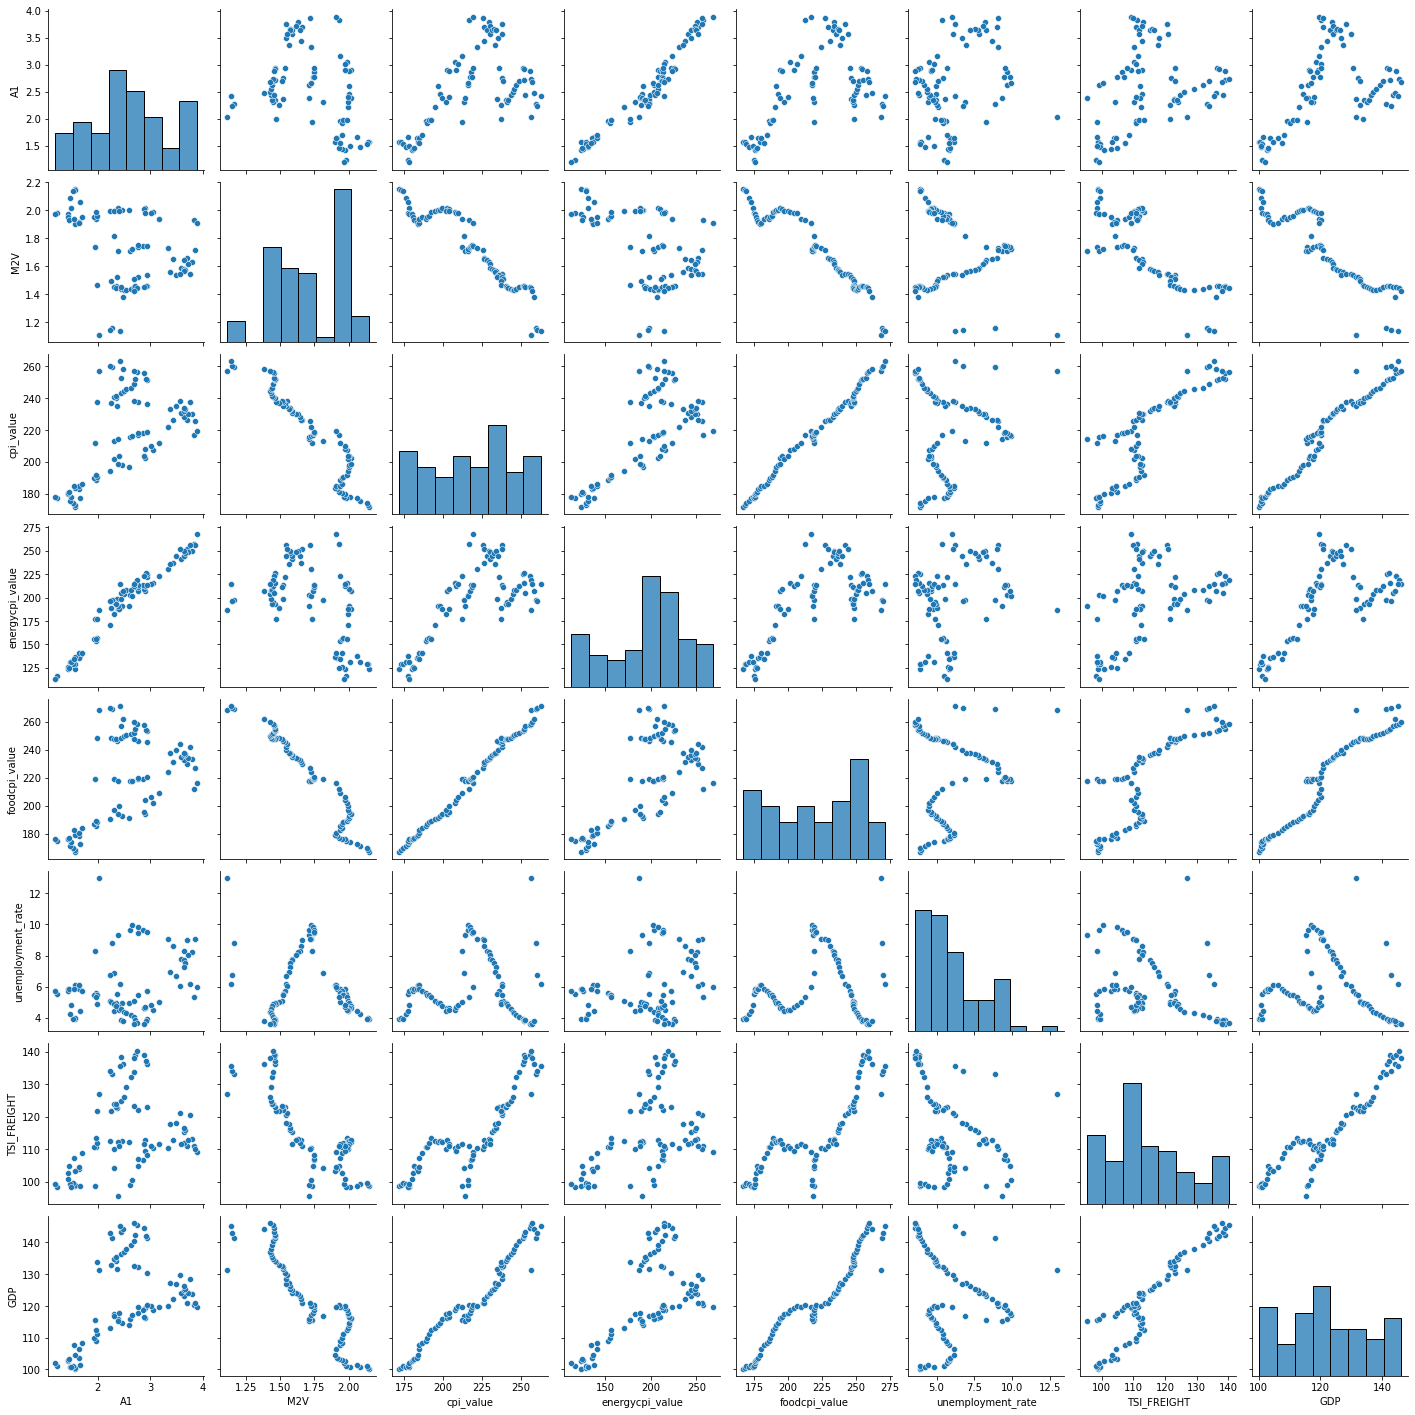

In [151]:
sns.pairplot(data = data)

The pair plot shows how each variable vary and behave with other variable

## Correlation Table

<AxesSubplot:>

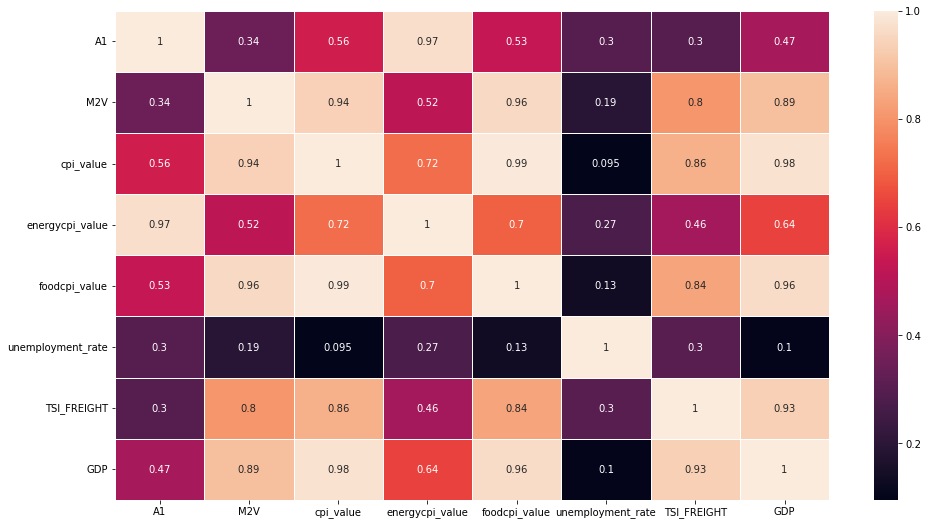

In [152]:
t,ax= plt.subplots(figsize=(16,9))
sns.heatmap(data.corr().abs(),annot=True,linewidths=.5,ax=ax)

From the above table we can see that:
- TSI_FREIGHT column is highly correlated with M2V, cpi_value,foodcpi_value and GDP. have normal correlation with energycpi_value and have low correlation with A1 and unemployment rate.
- GDP column is highly  M2V, cpi_value,foodcpi_value and TSI_FREIGHT. and have moderate correlation with energycpi_value and A1 and have low correlation with unemployment rate 

## Bi-Variant Visualization

/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/qooshane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

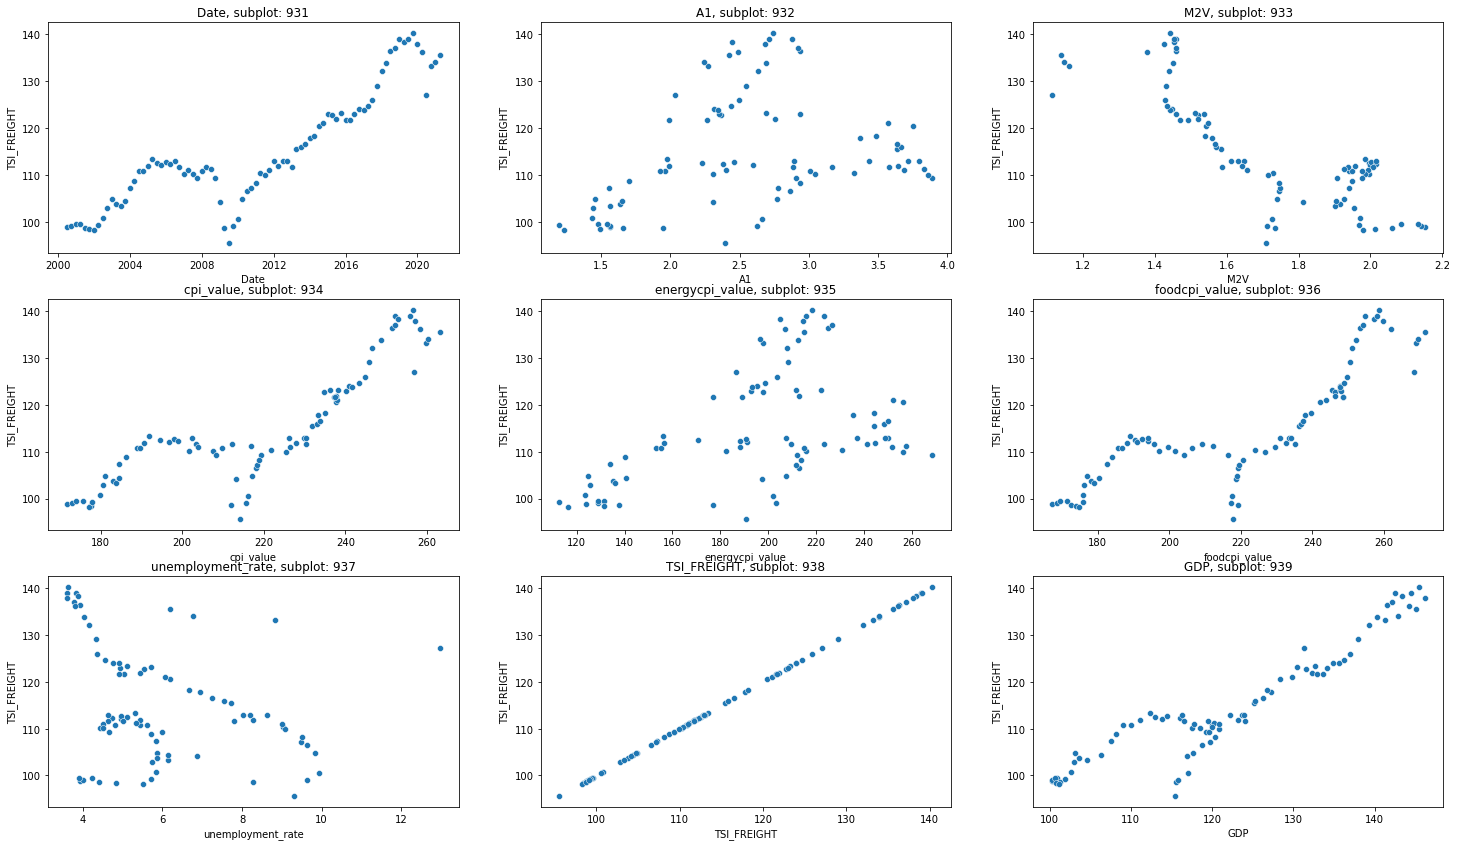

In [153]:
a=9
b=3
c=1
fig = plt.figure(figsize=(25,45))
for i in data.columns:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.scatterplot(data[i],data['TSI_FREIGHT'])
    c = c + 1

From the above graph we can see how each column affect our target variable which is TSI_FREIGHT.
- the price of TSI_FREIGHT increase over the time and year. it do have some sort of linear relationship with Date column
- the price of TSI_FREIGHT usually increase as the value of A1 increase, but this is not the case always. it donot have linear relationship with A1
- the general trend of the price of TSI_FREIGHT is that it decrease as the M2V increases, but this is not the case always, there are some points where they increases parallelly. 
- The price of TSI_FREIGHT increases as the cpi_value increases. and the relationships is slightly linear.
- the price of TSI_FREIGHT increases as the value of energycpi_value increase. but they have slightest linear relationship.
- the price of TSI_FREIGHT increases as the foodcpi_value increases as the values of foodcpi_values increases. they have linear relationship 
- the price of TSI_FREIGHT decreases as the unemployment_rate increases but the they don't have strong relationship
- The price of TSI_FREIGHT increases as the GDP increases, they have strong positive linear relationship.

## Feature Selection 

Based on the correlation value we will select features that are highly correlated with the target variable i.e. TSI_FREIGHT price

In [154]:
selected_df = data[['TSI_FREIGHT','M2V', 'cpi_value','foodcpi_value', 'GDP','energycpi_value']]
selected_df.head()

,TSI_FREIGHT,M2V,cpi_value,foodcpi_value,GDP,energycpi_value
0,98.800000,2.151,171.733333,167.066667,100.249000,123.766667
1,99.000000,2.141,173.100000,168.566667,100.349023,128.733333
2,99.533333,2.133,174.033333,169.333333,100.945459,128.800000
3,99.433333,2.085,175.700000,171.300000,100.618173,131.333333
4,98.700000,2.059,177.533333,172.466667,101.243403,137.900000


## Features Normalization 

Here we need to normalize the features before applying regression model 

In [155]:
norm_df = selected_df.apply(stats.zscore)
norm_df.head()

,TSI_FREIGHT,M2V,cpi_value,foodcpi_value,GDP,energycpi_value
0,-1.350809,1.677707,-1.772388,-1.721812,-1.638405,-1.791498
1,-1.334129,1.639260,-1.720638,-1.672832,-1.630903,-1.668470
2,-1.289647,1.608502,-1.685297,-1.647798,-1.586172,-1.666819
3,-1.297987,1.423957,-1.622188,-1.583581,-1.610718,-1.604066
4,-1.359150,1.323994,-1.552768,-1.545486,-1.563827,-1.441405


<AxesSubplot:>

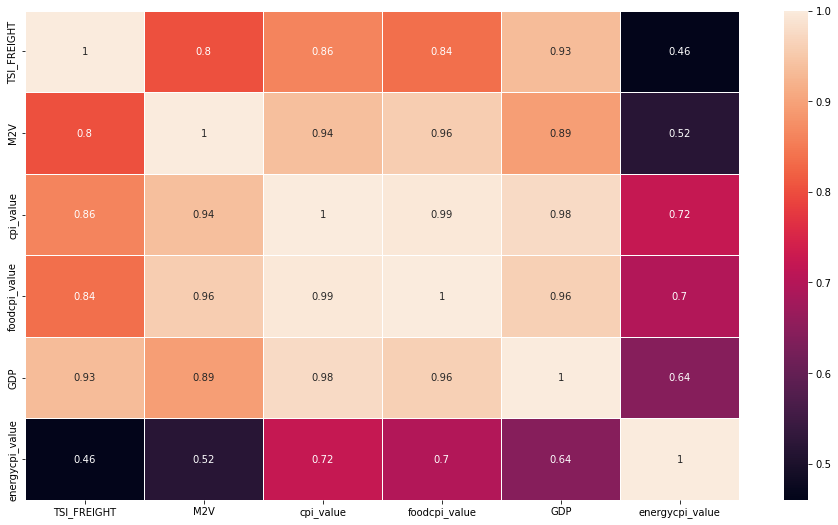

In [156]:
t,ax= plt.subplots(figsize=(16,9))
sns.heatmap(norm_df.corr().abs(),annot=True,linewidths=.5,ax=ax)

After normalizing selected features we check whether the variables hold their relationship with other variable or not. so for this we again plot the heatmap to check their correlation values.

and by observing the above heatmap we can say that yes these variables hold their natural relationship even after normalization

## OLS Regression

In [157]:
import statsmodels.api as sm

In [158]:
X = norm_df[['M2V', 'cpi_value','foodcpi_value', 'GDP','energycpi_value']]
Y = norm_df['TSI_FREIGHT']

In [159]:
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

In [160]:
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:            TSI_FREIGHT   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     280.4
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           2.52e-48
Time:                        17:46:08   Log-Likelihood:                 4.4180
No. Observations:                  84   AIC:                             3.164
Df Residuals:                      78   BIC:                             17.75
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             6.28e-16      0.026   2.

**Description of some of the terms in the table :**
- R-squared - statistical measure of how well the regression line approximates the real data points.
- Adj. R-squared - actually adjusts the statistics based on the number of independent variables present.
- F-statistic - the ratio of mean squared error of the model to the mean squared error of residuals.
- AIC - estimates the relative quality of statistical models for a given dataset.
- BIC - used as a criterion for model selection among a finite set of models.
- coef - the coefficients of the independent variables and the constant term in the equation.
- std err - the basic standard error of the estimate of the coefficient.
- t - a measure of how statistically significant the coefficient is.
- P > |t| - the null-hypothesis that the coefficient = 0 is true.

**Interpreting the Output** — We can see here that this model has a much higher R-squared value — 0.947, meaning that this model explains 94.7% of the variance in our dependent variable. Whenever we add variables to a regression model, R² will be higher, but this is a pretty high R². We can see that  'M2V', 'cpi_value','foodcpi_value', 'GDP','energycpi_value are statistically significant in predicting (or estimating) the TSI_FREIGHT price.


## Multiple Linear Regression

for implementing MLR we need to split the data into train test 

### Splitting Data

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error

In [162]:
y=norm_df['TSI_FREIGHT'].values
xx = norm_df[['M2V', 'cpi_value','foodcpi_value', 'GDP','energycpi_value']]
x=xx.values
y=y.reshape(-1,1)
xtrain , xtest , ytrain, ytest =train_test_split(x,y,test_size=0.2,random_state=42 )
print("xtrain shape : ", xtrain.shape) 
print("xtest shape  : ", xtest.shape) 
print("ytrain shape : ", ytrain.shape) 
print("ytest shape  : ", ytest.shape) 

xtrain shape :  (67, 5)
xtest shape  :  (17, 5)
ytrain shape :  (67, 1)
ytest shape  :  (17, 1)


### MLR

**Building MLR Model**

In [163]:
regressor = LinearRegression() 
model=regressor.fit(xtrain, ytrain) 

# predicting the test set results 
y_pred = regressor.predict(xtest) 

**Plotting Regression line**

In [164]:
qq = pd.DataFrame(ytest)[0].values.tolist()

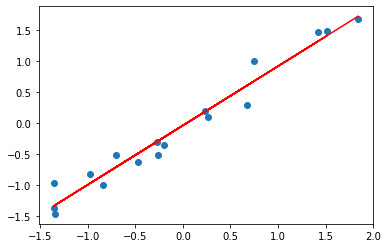

In [165]:
plt.plot(ytest, y_pred, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(qq, y_pred, 1)

# #add linear regression line to scatterplot 
plt.plot(ytest, m*ytest+b,color='red')

**Checking Model Efficiency and  Accuracy**

In [166]:
model_efficiency= model.score(xtrain,ytrain)
model_efficiency

0.9425624264884979

In [167]:
print("Accuracy: ",model.score(xtest, ytest) * 100)

Accuracy:  96.35218566833514


**checking error value**

the error value should be minimum

In [168]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# predicting the accuracy score
score=r2_score(ytest,y_pred)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(ytest,y_pred))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(ytest,y_pred)))

r2 socre is  0.9635218566833513
mean_sqrd_error is== 0.036214272968230085
root_mean_squared error of is== 0.19030048073567782


#### Comparing predicted values with the actual value through Graph

In [169]:
modelresult = pd.DataFrame({'Actual': ytest.flatten(), 'Predicted': y_pred.flatten().round(2)})
modelresult.head()

,Actual,Predicted
0,1.843553,1.69
1,-1.350809,-1.47
2,0.673121,0.30
3,-0.197058,-0.36
4,-0.975493,-0.83


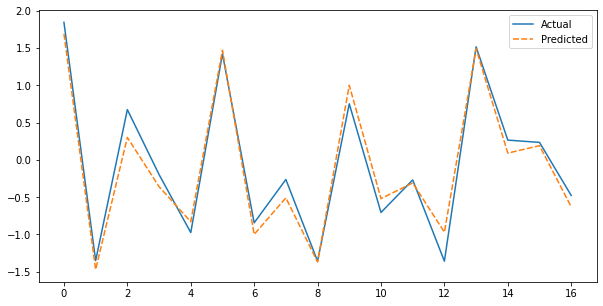

In [170]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(data=modelresult)

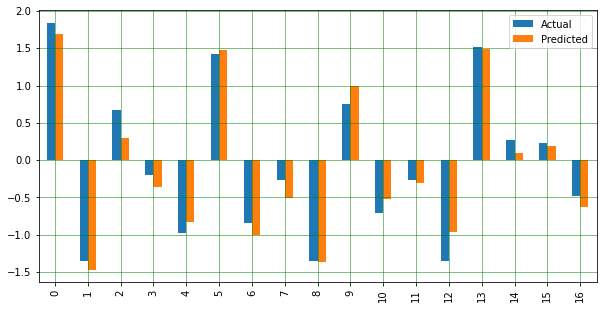

In [171]:
modelresult.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()